In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# LATAR BELAKANG

Sebuah perusaahan e-commerce, yaitu KamusBelanja, melakukan quarterly review dalam rangka meningkatkan penjualan. Oleh karena itu perusahaan perlu mengetahuiu profil pelanggan yang berhenti menggunakan aplikasi KamusBelanja.

Data dapat didapatkan [di sini](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data)

In [ ]:
 df=pd.read_excel('/content/drive/MyDrive/PWDK/Data Analytics/DATASET/E Commerce Dataset.xlsx')
 df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Berikut detail untuk setiap kolom:

**USERS PROFILE**
1. CustomerID: Nilai unik untuk setiap pengguna aplikasi.
2. Churn: pengguna dikategorikan sebagai pengguna yang berhenti atau tidak.
3. Tenure: Lama pengguna menggunakan aplikasi (bulan).
4. PreferredLoginDevice: Device yang digunakan untuk mengakses aplikasi.
5. CityTier: Kelompok kota tempat tinggal pengguna.
6. WarehouseToHome: Jarak gudang ke tempat tinggal pelanggan pada 7. setiap tier kota
7. PreferredPaymentMode: Metode pembayaran yang paling sering digunakan pengguna.
9. Gender: Gender pengguna.
10. MaritalStatus: Status pernikahan pengguna

**APPLICATION INTERACTION**
1. HourSpendOnApp: Lama penggunaan (dalam jam).
2. NumberOfDeviceRegistered: Banyaknya device yang digunakan oleh customer untuk akses aplikasi.
3. SatisfactionScore: Nilai kepuasan penggunaan produk.
4. NumberOfAddress: Jumlah alamat yang didaftarkan ke produk digital dalam satu customerID.

**ORDER PROFILE**
1. PreferedOrderCat: Kategori produk preferensi pengguna.
2. Complain: Pengelompokkan berdasarkan pernah mengajukan komplain atau tidak.
3. OrderAmountHikeFromlastYear: Kenaikan jumlah pesanan dibanding tahun lalu (dalam persen).
4. CouponUsed: Jumlah kupon yang sudah digunakan dalam satu bulan terakhir.
5. OrderCount: Jumlah pesanan dalam satu bulan terakhir.
6. DaySinceLastOrder: Lama hari setelah pemesanan terakhir.
7. CashbackAmount: Rata-rata cashback yang diterima pengguna dalam satu bulan terakhir.

#PROBLEM STATEMENT

1. Bagaimana karakteristik customer KamusBelanja yang berhenti menggunakan aplikasi?
2. Apa langkah promosi yang tepat untuk mempertahankan pengguna yang masih bertahan?

# DATA UNDERSTANDING & DATA CLEANING

In [ ]:
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')
df.info()

Jumlah baris: 5630
Jumlah kolom: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-nu

In [ ]:
check_duplicate=df.duplicated().sum()
print(f"Jumlah data yang duplicate adalah {check_duplicate}")

Jumlah data yang duplicate adalah 0


In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df.describe(include=object)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [ ]:
column = df.columns
unique_values=[df[col].unique() for col in column]
nunique_values=[len(df[col].unique()) for col in column]
missing_value=df.isna().sum()
pd.DataFrame({
    'missing_value': missing_value,
    'nunique': nunique_values,
    'unique': unique_values
})

,missing_value,nunique,unique
CustomerID,0,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Churn,0,2,"[1, 0]"
Tenure,264,37,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
PreferredLoginDevice,0,3,"[Mobile Phone, Phone, Computer]"
CityTier,0,3,"[3, 1, 2]"
WarehouseToHome,251,35,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
PreferredPaymentMode,0,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
Gender,0,2,"[Female, Male]"
HourSpendOnApp,255,7,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
NumberOfDeviceRegistered,0,6,"[3, 4, 5, 2, 1, 6]"


# DATA CLEANING & DATA UNDERSTANDING

Perlu diperhatikan korelasi antar kolom, sehingga apabila ada keperluan untuk imputation misisng value dapat menjadi referensi.

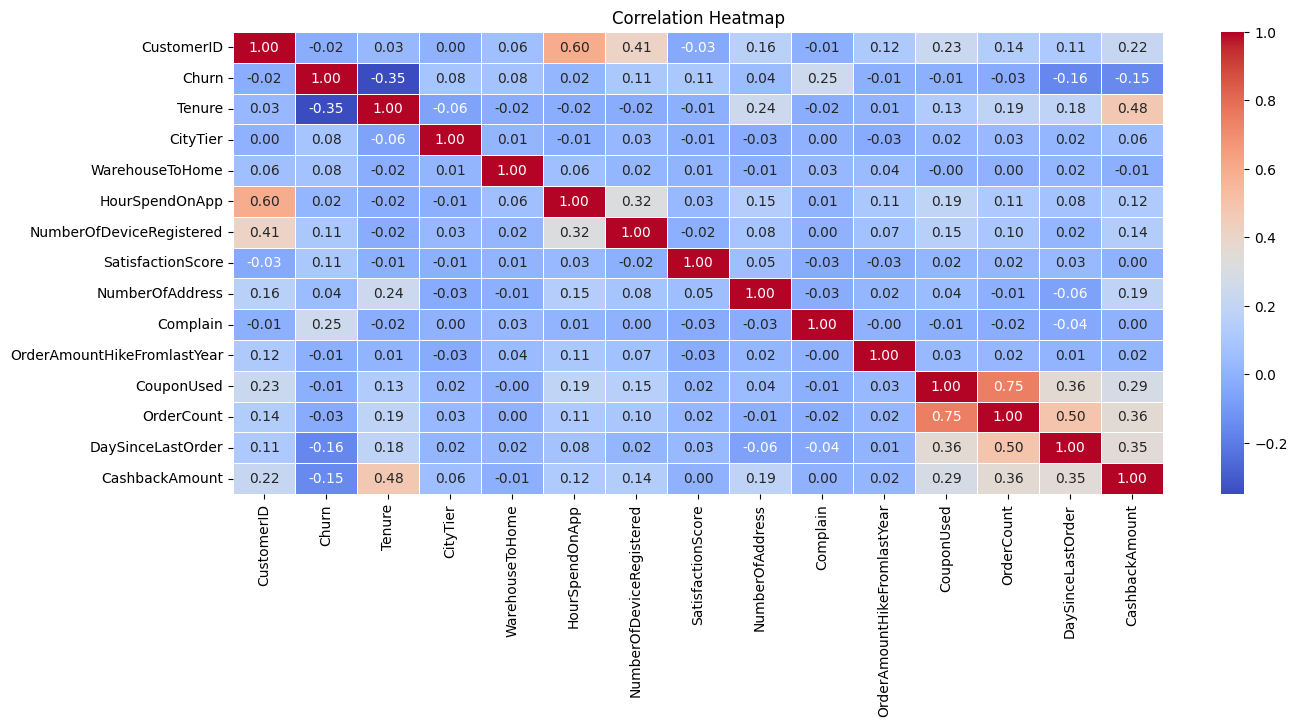

In [ ]:
corr_matrix=df.select_dtypes(include=np.number).corr(method='pearson')
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## TENURE

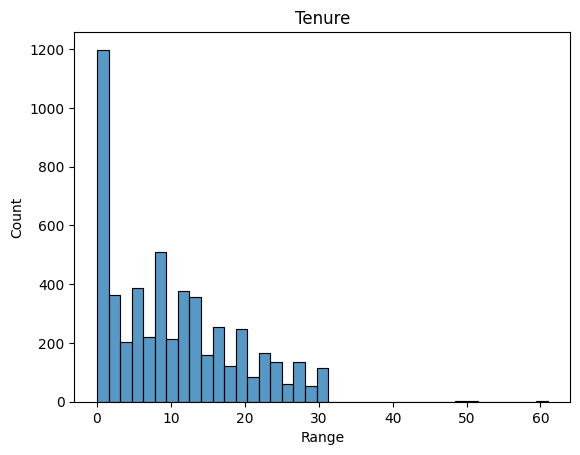

In [ ]:
sns.histplot(df['Tenure'])
plt.title('Tenure')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Churn', ylabel='Tenure'>

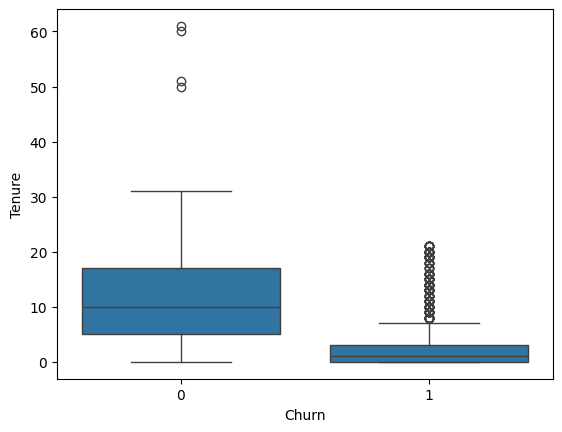

In [ ]:
sns.boxplot(x='Churn', y='Tenure', data=df)

Dengan beberapa outlier, pengguna yang dikategorikan berhenti memiliki periode penggunaan aplikasi yang lebih singkat.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Churn'], df['Tenure'])
stat, p, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
print(f"Chi-Squared Statistic: {stat:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if p <= alpha:
    print("Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara kelompok churn dan lama penggunaan aplikasi.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti bahwa terdapat hubungan antara kelompok churn dan lama penggunaan aplikasi.")

Chi-Squared Statistic: 1485.72
p-value: 0.0000
Degrees of Freedom: 35
Expected Frequencies Table:
[[4.25920984e+02 5.78514722e+02 1.40017331e+02 1.63493291e+02
  1.70200708e+02 1.71039135e+02 1.53432165e+02 1.85292397e+02
  2.20506336e+02 2.07091502e+02 1.78584980e+02 1.62654864e+02
  1.52593738e+02 1.51755311e+02 1.47563176e+02 1.33309914e+02
  1.24925643e+02 8.88732762e+01 1.03126537e+02 1.17379799e+02
  9.13885576e+01 7.04278792e+01 6.37204622e+01 7.46200149e+01
  6.28820350e+01 4.94672009e+01 5.03056280e+01 5.53361908e+01
  5.86898994e+01 4.61134924e+01 5.53361908e+01 4.10829296e+01
  8.38427134e-01 8.38427134e-01 8.38427134e-01 8.38427134e-01]
 [8.20790160e+01 1.11485278e+02 2.69826687e+01 3.15067089e+01
  3.27992918e+01 3.29608647e+01 2.95678345e+01 3.57076034e+01
  4.24936638e+01 3.99084980e+01 3.44150205e+01 3.13451360e+01
  2.94062616e+01 2.92446888e+01 2.84368245e+01 2.56900857e+01
  2.40743571e+01 1.71267238e+01 1.98734625e+01 2.26202013e+01
  1.76114424e+01 1.35721208e+01 1

Dengan hal tersebut, dapat dikatakan bahwa missing value "Tenure" dapat dilakukan imputasi berdasarkan "Churn"

In [ ]:
df['Tenure']=df.groupby('Churn')['Tenure'].transform(lambda x: x.fillna(x.median()))
df['Tenure'].isna().sum()

np.int64(0)

## Formatting

Mengubah format pada PreferredLoginDevice & PreferedOrderCat dikarenakan Mobile, Phone & Mobile Phone memiliki values yang sama.

In [ ]:
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Mobile Phone','Mobile')
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Phone','Mobile')
df['PreferredLoginDevice'].unique()

array(['Mobile', 'Computer'], dtype=object)

In [ ]:
df['PreferedOrderCat']=df['PreferedOrderCat'].replace('Mobile Phone','Mobile')
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Others', 'Fashion', 'Grocery'],
      dtype=object)

## Distance

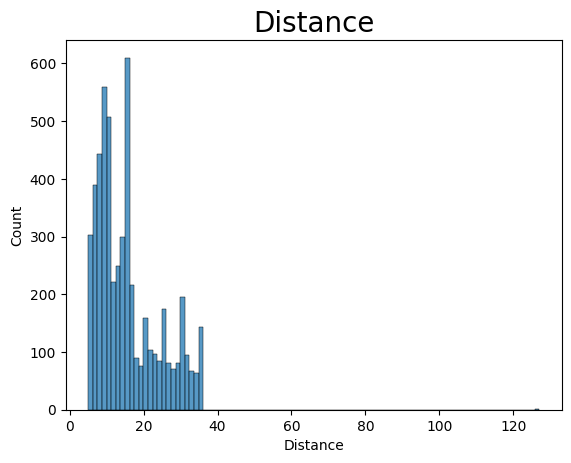

In [ ]:
sns.histplot(data=df['WarehouseToHome'])
plt.title('Distance', size = 20)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

Range distance berada di sekitar 5-35 KM

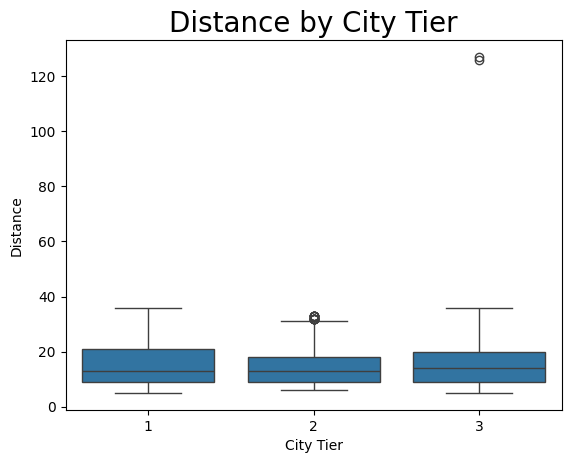

In [ ]:
sns.boxplot(data=df, x='CityTier', y='WarehouseToHome')
plt.title('Distance by City Tier', size = 20)
plt.xlabel('City Tier')
plt.ylabel('Distance')
plt.show()

Kebanyakkan pengguna tinggal pada city tier 1 & 3 dengan jarak gudang terjauh pada sekitar 40 KM. Namun pada city tier 3 terdapat outlier hingga 120KM

In [ ]:
summary_city_wh = (
    df.groupby('CityTier')['WarehouseToHome']
    .agg(['mean', 'median', 'count'])
    .reset_index()
)
summary_city_wh

,CityTier,mean,median,count
0,1,15.597399,13.0,3460
1,2,14.978632,13.0,234
2,3,15.818991,14.0,1685


Oleh karena itu, untuk mengisi missing value pada WarehouseToHome dapat digunakan median pada setiap CityTier.

In [ ]:
df['WarehouseToHome']=(
    df.groupby('CityTier')['WarehouseToHome']
    .transform(lambda x: x.fillna(x.median()))
)
df['WarehouseToHome'].isna().sum()

np.int64(0)

## Hour Spend on App

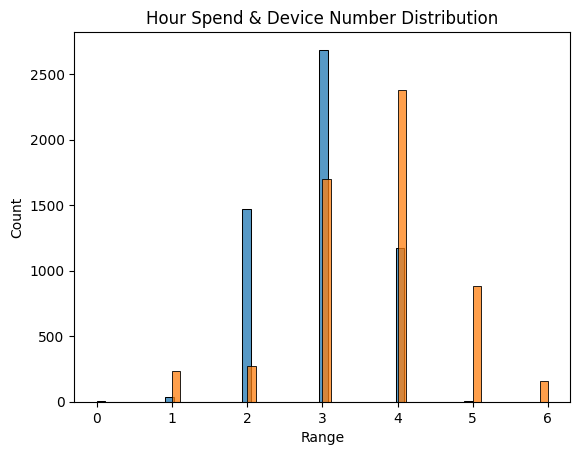

In [ ]:
sns.histplot(df['HourSpendOnApp'])
sns.histplot(df['NumberOfDeviceRegistered'])
plt.title('Hour Spend & Device Number Distribution')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

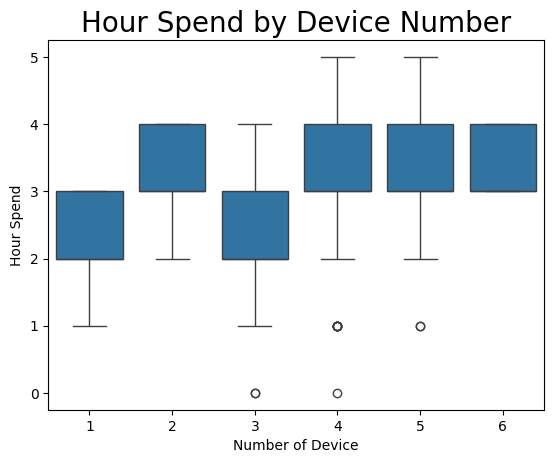

In [ ]:
sns.boxplot(data=df, x='NumberOfDeviceRegistered', y='HourSpendOnApp')
plt.title('Hour Spend by Device Number', size = 20)
plt.xlabel('Number of Device')
plt.ylabel('Hour Spend')
plt.show()

Untuk seluruh jumlah device yang digunakan, pengguna menghabiskan waktu pada produk digital selama 1-5 jam.

Chi-Squared Test untuk melihat apakah ada hubungan untuk kedua kategori tersebut.

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['NumberOfDeviceRegistered'], df['HourSpendOnApp'])

stat, p, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
print(f"Chi-Squared Statistic: {stat:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if p <= alpha:
    print("Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara jumlah device & waktu yang dihabiskan dalam aplikasi.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti bahwa terdapat hubungan antara jumlah device & waktu yang dihabiskan dalam aplikasi.")

Chi-Squared Statistic: 1283.34
p-value: 0.0000
Degrees of Freedom: 25
Expected Frequencies Table:
[[1.14418605e-01 1.33488372e+00 5.61032558e+01 1.02480930e+02
  4.48520930e+01 1.14418605e-01]
 [1.51255814e-01 1.76465116e+00 7.41657674e+01 1.35474791e+02
  5.92922791e+01 1.51255814e-01]
 [8.65674419e-01 1.00995349e+01 4.24469023e+02 7.75355721e+02
  3.39344372e+02 8.65674419e-01]
 [1.29320930e+00 1.50874419e+01 6.34103628e+02 1.15828447e+03
  5.06938047e+02 1.29320930e+00]
 [4.85023256e-01 5.65860465e+00 2.37823070e+02 4.34419163e+02
  1.90129116e+02 4.85023256e-01]
 [9.04186047e-02 1.05488372e+00 4.43352558e+01 8.09849302e+01
  3.54440930e+01 9.04186047e-02]]
Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara jumlah device & waktu yang dihabiskan dalam aplikasi.


Oleh karena itu, missing value dapat dilakukan dengan mengisi median durasi penggunaan produk digital dikelommpokkan berdasarkan jumlah device yang digunakan.

In [ ]:
df['HourSpendOnApp']=(
    df
    .groupby('NumberOfDeviceRegistered')['HourSpendOnApp']
    .transform(lambda x: x.fillna(x.median()))
)
df['HourSpendOnApp'].isna().sum()

np.int64(0)

## Order Amount Hike from Last Year

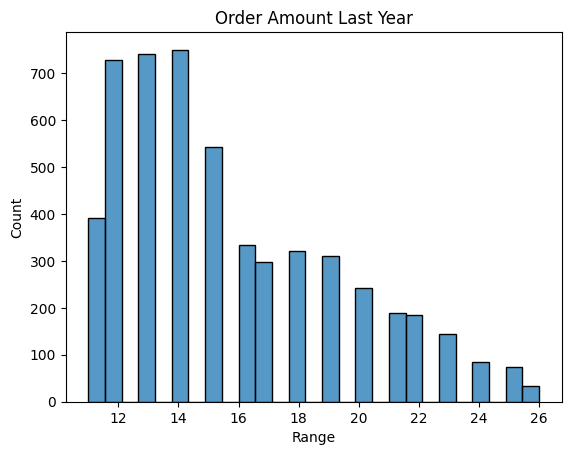

In [ ]:
sns.histplot(df['OrderAmountHikeFromlastYear'])
plt.title('Order Amount Last Year')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['OrderAmountHikeFromlastYear'], df['Tenure'])
stat, p, dof, expected=chi2_contingency(contingency_table)

alpha = 0.05
print(f"Chi-Squared Statistic: {stat:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if p <= alpha:
    print("Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara banyaknya jumlah order dan lama penggunaan aplikasi.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti bahwa terdapat hubungan antara banyaknya jumlah order dan lama penggunaan aplikasi.")

Chi-Squared Statistic: 1159.78
p-value: 0.0000
Degrees of Freedom: 510
Expected Frequencies Table:
[[3.70229264e+01 5.60445480e+01 1.21709226e+01 1.42115564e+01
  1.46488350e+01 1.47217148e+01 1.33369991e+01 1.59606710e+01
  1.90216216e+01 1.78555452e+01 2.88603914e+01 1.41386766e+01
  1.29726002e+01 1.20980429e+01 1.17336440e+01 1.06404473e+01
  9.47437092e+00 6.92357875e+00 8.08965517e+00 9.18285182e+00
  6.26766076e+00 5.24734390e+00 4.81006524e+00 5.32022367e+00
  3.49822926e+00 4.08126747e+00 3.93550792e+00 4.29990680e+00
  4.15414725e+00 2.55079217e+00 4.37278658e+00 3.13383038e+00
  7.28797763e-02 7.28797763e-02 7.28797763e-02]
 [6.89327120e+01 1.04348928e+02 2.26609506e+01 2.64603914e+01
  2.72745573e+01 2.74102516e+01 2.48320596e+01 2.97170550e+01
  3.54162162e+01 3.32451072e+01 5.37349487e+01 2.63246971e+01
  2.41535881e+01 2.25252563e+01 2.18467847e+01 1.98113700e+01
  1.76402610e+01 1.28909599e+01 1.50620690e+01 1.70974837e+01
  1.16697111e+01 9.76999068e+00 8.95582479e+00 

Dengan adanya cukup bukti maka pengisi kenaikan tingkat order dapat dilakukan dengan melakukan imputation median berdasarkan kelompok "Tenure".

In [ ]:
med_order_amount=df['OrderAmountHikeFromlastYear'].median()
df['OrderAmountHikeFromlastYear']=(
    df
    .groupby('Tenure')['OrderAmountHikeFromlastYear']
    .transform(lambda x: x.fillna(x.median()) if x.notna().any() else med_order_amount)
)
df['OrderAmountHikeFromlastYear'].isna().sum()

np.int64(0)

## COUPON USED

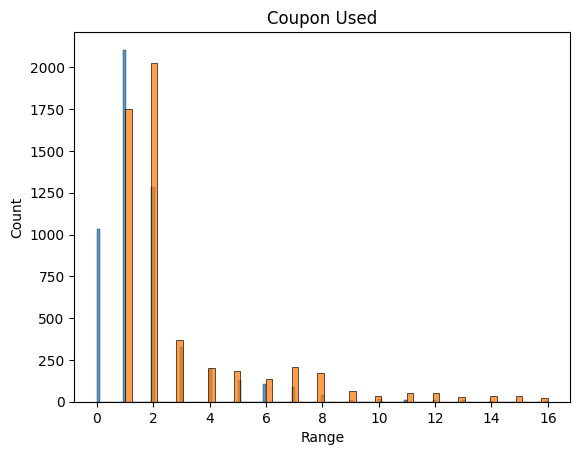

In [ ]:
sns.histplot(df['CouponUsed'])
sns.histplot(df['OrderCount'])
plt.title('Coupon Used')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

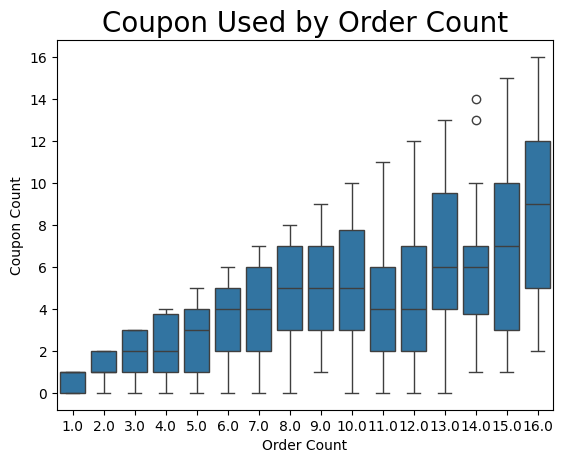

In [ ]:
sns.boxplot(data=df,x='OrderCount',y='CouponUsed')
plt.title('Coupon Used by Order Count', size = 20)
plt.xlabel('Order Count')
plt.ylabel('Coupon Count')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['OrderCount'], df['CouponUsed'])
stat, p, dof, expected=chi2_contingency(contingency_table)

alpha = 0.05
print(f"Chi-Squared Statistic: {stat:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if p <= alpha:
    print("Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara banyaknya jumlah penggunaan kupon dan jumlah order.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti bahwa terdapat hubungan antara banyaknya jumlah penggunaan kupon dan jumlah order.")

Chi-Squared Statistic: 9904.48
p-value: 0.0000
Degrees of Freedom: 240
Expected Frequencies Table:
[[3.26917905e+02 6.67677091e+02 4.04033620e+02 9.85367475e+01
  5.83311181e+01 3.88874120e+01 3.36145426e+01 2.66939015e+01
  1.31821736e+01 4.28420641e+00 4.28420641e+00 2.63643471e+00
  2.63643471e+00 1.97732604e+00 1.31821736e+00 3.29554339e-01
  6.59108679e-01]
 [3.80628616e+02 7.77372557e+02 4.70413995e+02 1.14725762e+02
  6.79145817e+01 4.52763878e+01 3.91372166e+01 3.10795543e+01
  1.53479281e+01 4.98807662e+00 4.98807662e+00 3.06958561e+00
  3.06958561e+00 2.30218921e+00 1.53479281e+00 3.83698202e-01
  7.67396403e-01]
 [6.96106333e+01 1.42168491e+02 8.60308835e+01 2.09814308e+01
  1.24204457e+01 8.28029711e+00 7.15754496e+00 5.68393276e+00
  2.80688038e+00 9.12236122e-01 9.12236122e-01 5.61376075e-01
  5.61376075e-01 4.21032056e-01 2.80688038e-01 7.01720094e-02
  1.40344019e-01]
 [3.45144644e+01 7.04902267e+01 4.26559812e+01 1.04030493e+01
  6.15832682e+00 4.10555121e+00 3.5488663

Dikarenakan bentuk persebaran right skew dan terhadap hubungan yang cukup maka pengisian missing value:
1. Dikelompokkan berdasarkan OrderCount
2. Diisi dengan median

In [ ]:
med_coupon=df['CouponUsed'].median(skipna=True)
df['CouponUsed']=(
    df
    .groupby('OrderCount')['CouponUsed']
    .transform(lambda x: x.fillna(x.median(skipna=True)) if x.notna().any() else med_coupon)
)
df['CouponUsed'].isna().sum()

np.int64(258)

In [ ]:
df[df['CouponUsed'].isna()].head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
64,50065,0,24.0,Mobile,1,9.0,Credit Card,Female,3.0,3,Grocery,4,Single,4,0,18.0,NaN,NaN,0.0,237.34
90,50091,0,14.0,Mobile,3,12.0,Debit Card,Female,3.0,3,Fashion,2,Single,4,1,18.0,NaN,NaN,0.0,235.91
110,50111,0,16.0,Mobile,3,22.0,E wallet,Female,3.0,3,Grocery,2,Divorced,6,1,22.0,NaN,NaN,9.0,260.64
120,50121,0,4.0,Computer,1,9.0,Credit Card,Male,3.0,3,Fashion,3,Married,10,0,12.0,NaN,NaN,2.0,236.75
143,50144,0,18.0,Mobile,1,26.0,Credit Card,Male,3.0,3,Grocery,2,Divorced,1,1,14.0,NaN,NaN,10.0,234.96


Masih terdapat sisa missing value pada kolom CouponUsed yang disebabkan oleh kolom OrderCount yang masih missing. Oleh karena itu perlu dilakukan pengecekkan untuk missing value pada order count.

In [ ]:
med_count_order=df['OrderCount'].median(skipna=True)
df['OrderCount']=(
    df
    .groupby('CouponUsed')['OrderCount']
    .transform(lambda x: x.fillna(x.median(skipna=True)) if x.notna().any() else med_count_order)
)
df['CouponUsed'].isna().sum()

np.int64(258)

## Day Since Last Order

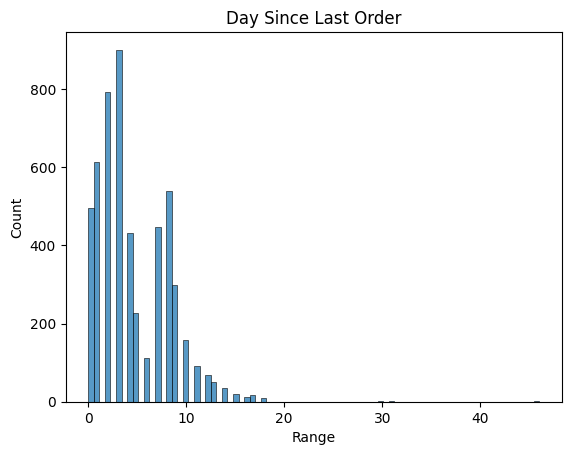

In [ ]:
sns.histplot(df['DaySinceLastOrder'])
plt.title('Day Since Last Order')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

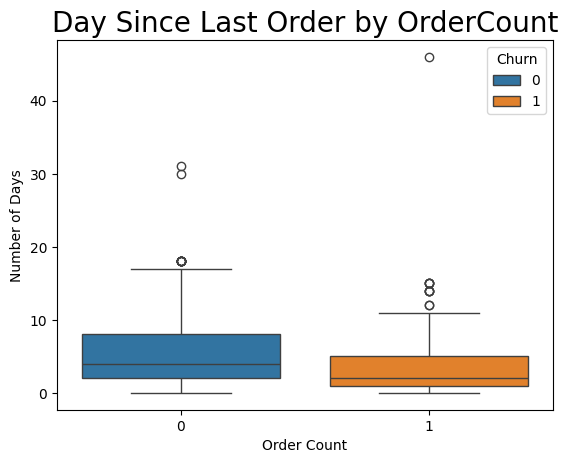

In [ ]:
sns.boxplot(data=df, x='Churn', y='DaySinceLastOrder',hue='Churn')
plt.title('Day Since Last Order by OrderCount', size = 20)
plt.xlabel('Order Count')
plt.ylabel('Number of Days')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['DaySinceLastOrder'], df['Churn'])
stat, p, dof, expected=chi2_contingency(contingency_table)

alpha = 0.05
print(f"Chi-Squared Statistic: {stat:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

if p <= alpha:
    print("Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara banyaknya durasi sejak terakhir transaksi dan jenis pengguna.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti bahwa terdapat hubungan antara banyaknya durasi sejak terakhir transaksi dan jenis pengguna.")

Chi-Squared Statistic: 264.87
p-value: 0.0000
Degrees of Freedom: 21
Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara banyaknya durasi sejak terakhir transaksi dan jenis pengguna.


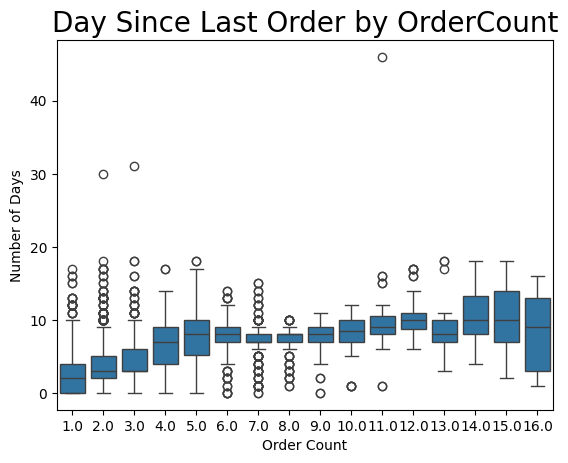

In [ ]:
sns.boxplot(data=df, x='OrderCount', y='DaySinceLastOrder')
plt.title('Day Since Last Order by OrderCount', size = 20)
plt.xlabel('Order Count')
plt.ylabel('Number of Days')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['DaySinceLastOrder'], df['OrderCount'])
stat, p, dof, expected=chi2_contingency(contingency_table)

alpha = 0.05
print(f"Chi-Squared Statistic: {stat:.2f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

if p <= alpha:
    print("Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara banyaknya durasi sejak terakhir transaksi dan jumlah order.")
else:
    print("Gagal menolak H0: Tidak ada cukup bukti bahwa terdapat hubungan antara banyaknya durasi sejak terakhir transaksi dan jumlah order.")

Chi-Squared Statistic: 4804.73
p-value: 0.0000
Degrees of Freedom: 315
Tolak H0: Ada cukup bukti bahwa terdapat hubungan antara banyaknya durasi sejak terakhir transaksi dan jumlah order.


Karena adanya hubungan antara durasi sejak terakhir pembelian dengan kelompokm pengguna dan order count, serta jenis distribusi yang right skew, maka imputation dapat dilakukan.

In [ ]:
med_days = df['DaySinceLastOrder'].median()

df['DaySinceLastOrder']=(
    df.groupby(['Churn', 'OrderCount'])['DaySinceLastOrder']
      .transform(lambda x: x.fillna(x.median(skipna=True))
                 if x.notna().any() else med_days)
)
df['DaySinceLastOrder'].isna().sum()

np.int64(258)

## AFTER IMPUTATION

In [ ]:
column = df.columns
unique_values=[df[col].unique() for col in column]
nunique_values=[len(df[col].unique()) for col in column]
missing_value=df.isna().sum()
pd.DataFrame({
    'missing_value': missing_value,
    'nunique': nunique_values,
    'unique': unique_values
})

,missing_value,nunique,unique
CustomerID,0,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Churn,0,2,"[1, 0]"
Tenure,0,36,"[4.0, 1.0, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
PreferredLoginDevice,0,2,"[Mobile, Computer]"
CityTier,0,3,"[3, 1, 2]"
WarehouseToHome,0,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
PreferredPaymentMode,0,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
Gender,0,2,"[Female, Male]"
HourSpendOnApp,0,6,"[3.0, 2.0, 1.0, 0.0, 4.0, 5.0]"
NumberOfDeviceRegistered,0,6,"[3, 4, 5, 2, 1, 6]"


Dapat dilakukan drop baris kosong, di mana semua CouponUsed, OrderCount & DaySinceLastOrder missing value. Hal ini dikarenakan ketiga kolom tersebut merupakan bagian penting dalam analisis LRF dan promosi.

In [ ]:
df=df.dropna()
print(f'Jumlah baris: {df.shape[0]}')
print(f'Jumlah kolom: {df.shape[1]}')
df.info()

Jumlah baris: 5372
Jumlah kolom: 20
<class 'pandas.core.frame.DataFrame'>
Index: 5372 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5372 non-null   int64  
 1   Churn                        5372 non-null   int64  
 2   Tenure                       5372 non-null   float64
 3   PreferredLoginDevice         5372 non-null   object 
 4   CityTier                     5372 non-null   int64  
 5   WarehouseToHome              5372 non-null   float64
 6   PreferredPaymentMode         5372 non-null   object 
 7   Gender                       5372 non-null   object 
 8   HourSpendOnApp               5372 non-null   float64
 9   NumberOfDeviceRegistered     5372 non-null   int64  
 10  PreferedOrderCat             5372 non-null   object 
 11  SatisfactionScore            5372 non-null   int64  
 12  MaritalStatus                5372 non-null   

# DATA ANALYTICS

In [ ]:
total_churn=df['Churn'].value_counts().reset_index(name='count')
total_churn

,Churn,count
0,0,4442
1,1,930


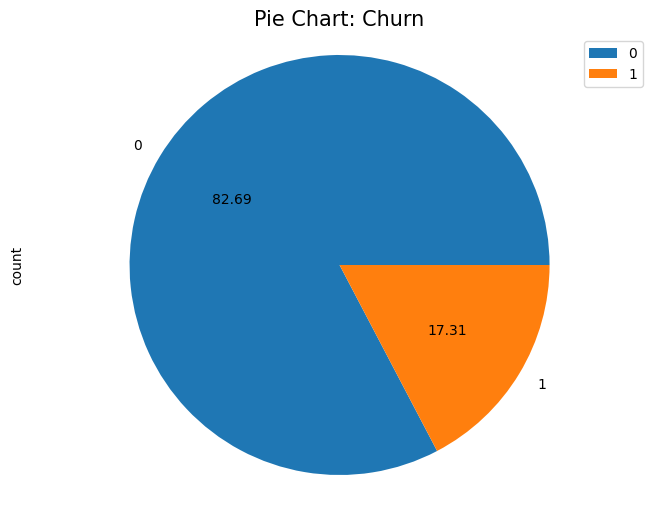

In [ ]:
total_churn.plot.pie(y = 'count',
                    figsize = (8,6),
                     autopct = '%.2f'
                    )
plt.axis('equal')
plt.title('Pie Chart: Churn', size=15)
plt.show()

Terdapat 17.31% dari total pengguna yang dikategorikan sebagai churn. Oleh karena itu perlu dilihat karakteristik yang menjadikan pengguna-pengguna untuk dapat memberikan rekomendasi.

### TENURE

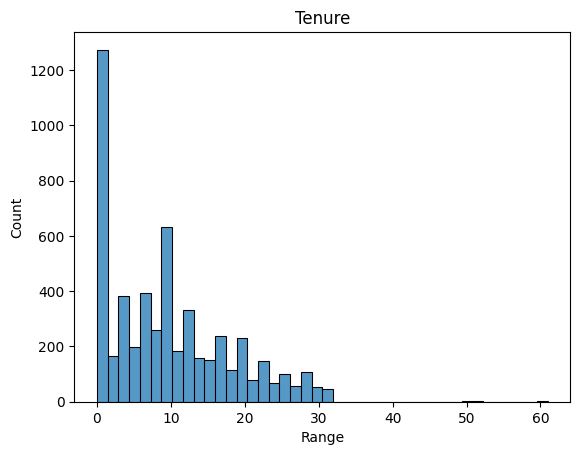

In [ ]:
sns.histplot(df['Tenure'])
plt.title('Tenure')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

In [ ]:
tenure_churn=df.loc[df['SatisfactionScore']==1,['CustomerID','Tenure']]
tenure_churn=tenure_churn.groupby('Tenure')['CustomerID'].count().reset_index(name='Count')
tenure_churn

,Tenure,Count
0,0.0,95
1,1.0,130
2,2.0,33
3,3.0,37
4,4.0,44
5,5.0,53
6,6.0,41
7,7.0,53
8,8.0,59
9,9.0,58


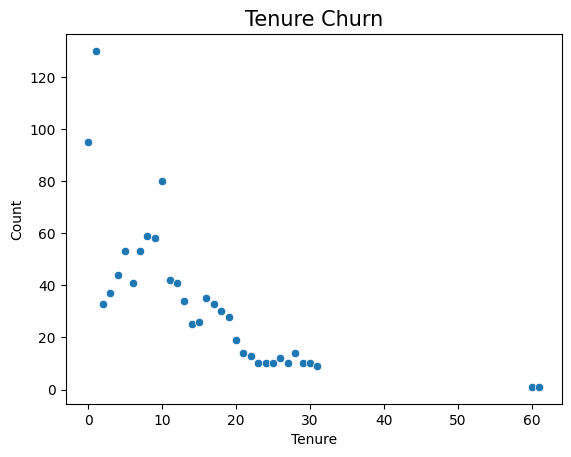

In [ ]:
sns.scatterplot(tenure_churn,x='Tenure',y='Count')
plt.title('Tenure Churn', size=15)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

"Tenure" pengguna yang churn rata-rata berada pada 0-10 bulan. Semakin lama menggunakan produk digital, semakin sedikit pengguna yang churn.

### Satisfaction Score

In [ ]:
satisfaction_churn=df.loc[df['SatisfactionScore']==1,['CustomerID','SatisfactionScore']]
satisfaction_churn=satisfaction_churn.groupby('SatisfactionScore')['CustomerID'].count().reset_index(name='Count')
satisfaction_churn=satisfaction_churn.set_index('SatisfactionScore')
satisfaction_churn

,Count
SatisfactionScore,
1,1120


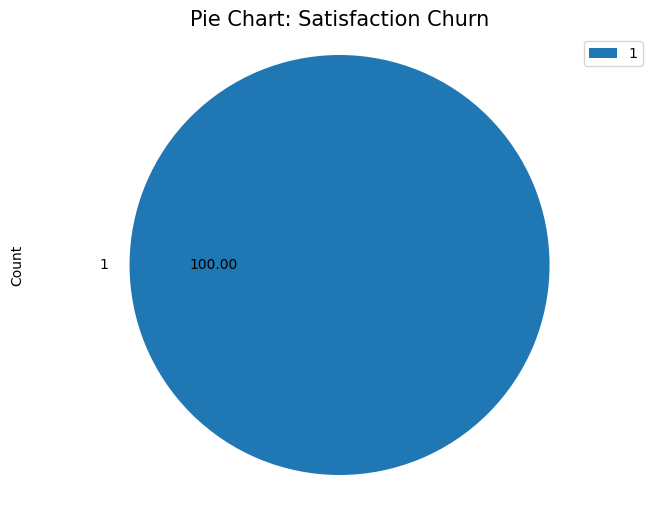

In [ ]:
satisfaction_churn.plot.pie(y='Count',
                    figsize=(8,6),
                    autopct='%.2f'
)
plt.axis('equal')
plt.title('Pie Chart: Satisfaction Churn', size=15)
plt.show()

100% pengguna yang berhenti menggunakan aplikasi memberi nilai kepuasan sebesar 1.

### Complain

In [ ]:
complain_churn=df.loc[df['Complain']==1,['CustomerID','Complain']]
complain_churn=complain_churn.groupby('Complain')['CustomerID'].count().reset_index(name='Count')
complain_churn=complain_churn.set_index('Complain')
complain_churn

,Count
Complain,
1,1512


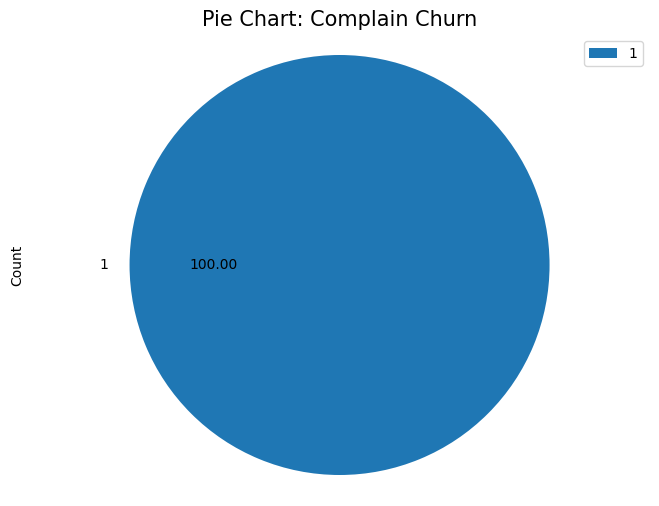

In [ ]:
complain_churn.plot.pie(y='Count',
                    figsize=(8,6),
                    autopct='%.2f'
)
plt.axis('equal')
plt.title('Pie Chart: Complain Churn', size=15)
plt.show()

100% pengguna yang berhenti menggunakan aplikasi pernah mengajukan complain.

## USERS BEHAVIOUR

### GENDER

In [ ]:
gender_churn=df.loc[df['Churn']==1,'Gender'].value_counts().reset_index(name='count')
gender_churn

,Gender,count
0,Male,586
1,Female,344


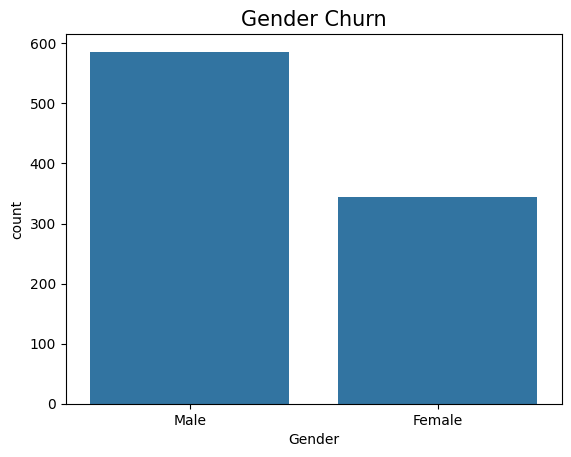

In [ ]:
sns.barplot(data=gender_churn,x='Gender',y='count')
plt.title('Gender Churn', size=15)
plt.show()

Jumlah pengguna yang berhenti menggunakan aplikasi merupakan laki-laki.

### CITY TIER

In [ ]:
city_churn=df.loc[df['Churn']==1,'CityTier'].value_counts().reset_index(name='count')
city_churn

,CityTier,count
0,1,526
1,3,356
2,2,48


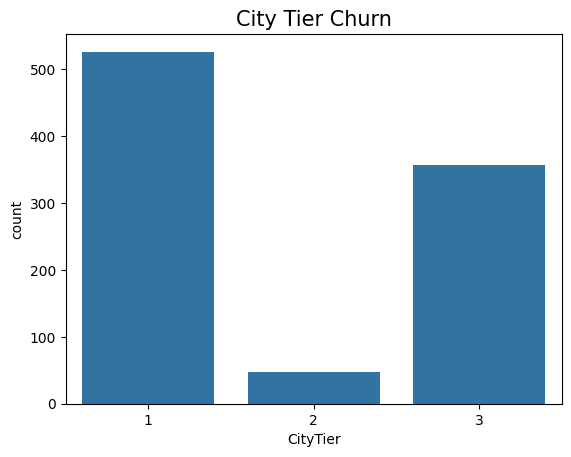

In [ ]:
sns.barplot(data=city_churn,x='CityTier',y='count')
plt.title('City Tier Churn', size=15)
plt.show()

In [ ]:
city_churn=df.loc[df['Churn']==1,['Gender','CityTier']].value_counts().reset_index(name='count')
city_churn

,Gender,CityTier,count
0,Male,1,354
1,Male,3,208
2,Female,1,172
3,Female,3,148
4,Female,2,24
5,Male,2,24


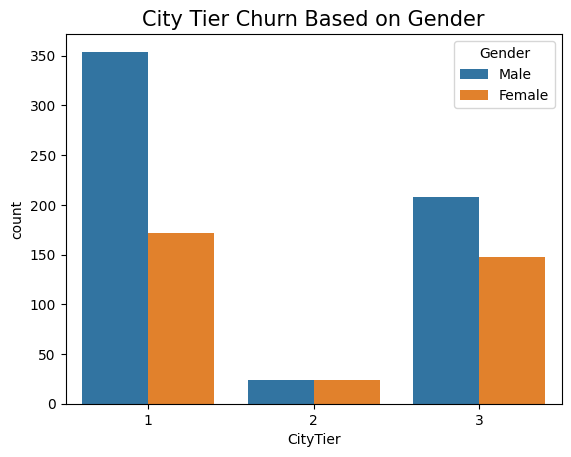

In [ ]:
sns.barplot(data=city_churn,x='CityTier',y='count',hue='Gender')
plt.title('City Tier Churn Based on Gender', size=15)
plt.show()

Pengguna berhenti kebanyakkan merupakan laki-laki yang tinggal pada CityTier 1 & 3.

### Warehouse to Home

In [ ]:
distance_churn=df.loc[df['Churn']==1,['Gender','CityTier','WarehouseToHome']]
distance_churn

,Gender,CityTier,WarehouseToHome
0,Female,3,6.0
1,Male,1,8.0
2,Male,1,30.0
3,Male,3,15.0
4,Male,1,12.0
...,...,...,...
5556,Male,3,31.0
5598,Male,3,16.0
5602,Male,1,8.0
5604,Male,1,14.0


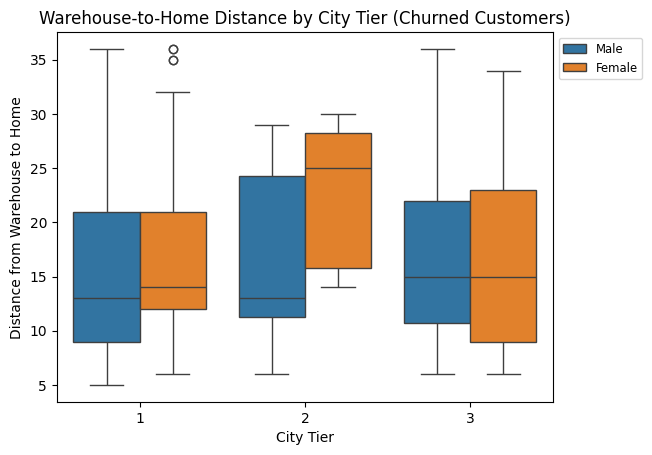

In [ ]:
sns.boxplot(data=distance_churn, x='CityTier', y='WarehouseToHome',hue='Gender')
plt.title('Warehouse-to-Home Distance by City Tier (Churned Customers)')
plt.xlabel('City Tier')
plt.ylabel('Distance from Warehouse to Home')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

CityTier 2 memiliki rata-rata jarak gudang ke rumah lebih jauh dibandingkan dengan  CityTier 1 & 3. Terutama untuk para perempuan yang tinggal lebih jauh dibanding laki-laki di CityTier 2. Untuk CityTier 1 & 3 nilai persebaran lebih kecil, menjadikan kemungkinan adanya faktor lain selain jarak yang mempengaruhi pengguna untuk berhenti menggunakan aplikasi.

### DEVICE & HOUR SPEND ON APP

Selain lokasi, ciri khas pengguna yang mengalami churn dapat dianalisis dari perilaku dalam penggunaan aplikasi, seperti jumlah device yang digunakan & lama penggunaan aplikasi.

In [ ]:
device_churn=df.loc[df['Churn']==1,['PreferredLoginDevice','NumberOfDeviceRegistered','HourSpendOnApp','CustomerID']]
device_churn=device_churn.groupby(['PreferredLoginDevice','NumberOfDeviceRegistered','HourSpendOnApp'])['CustomerID'].count().reset_index(name='Count')
device_churn

,PreferredLoginDevice,NumberOfDeviceRegistered,HourSpendOnApp,Count
0,Computer,1,2.0,6
1,Computer,1,3.0,5
2,Computer,2,2.0,1
3,Computer,2,3.0,8
4,Computer,2,4.0,5
5,Computer,3,2.0,45
6,Computer,3,3.0,33
7,Computer,3,4.0,1
8,Computer,4,2.0,22
9,Computer,4,3.0,65


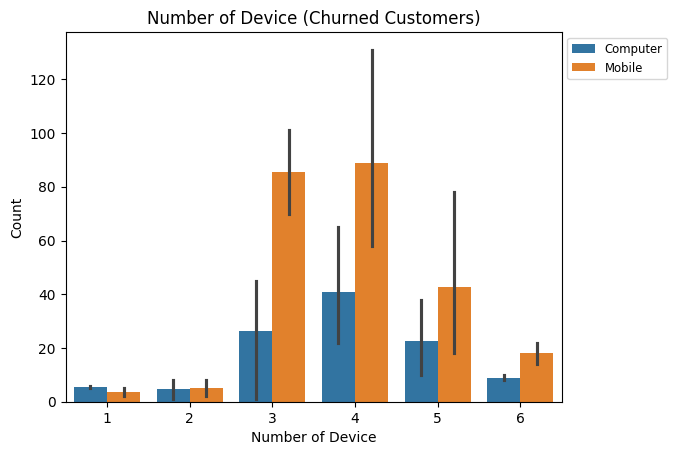

In [ ]:
sns.barplot(data=device_churn, x='NumberOfDeviceRegistered', y='Count',hue='PreferredLoginDevice')
plt.title('Number of Device (Churned Customers)')
plt.xlabel('Number of Device')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Rata-rata pengguna yang berhenti menggunakan aplikasi adalah pengguna mobile dengan 3-6

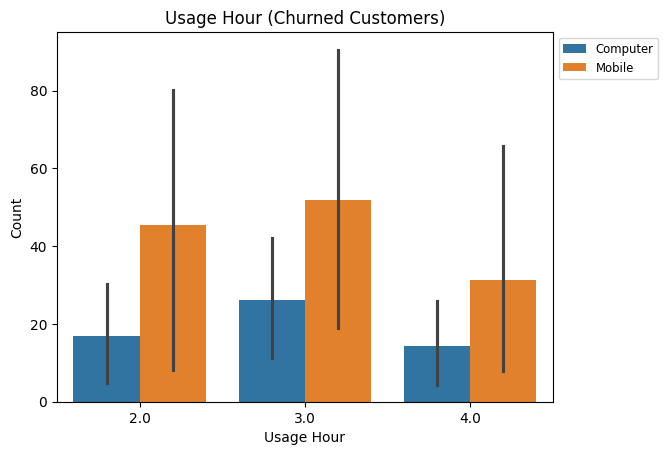

In [ ]:
sns.barplot(data=device_churn, x='HourSpendOnApp', y='Count',hue='PreferredLoginDevice')
plt.title('Usage Hour (Churned Customers)')
plt.xlabel('Usage Hour')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Utamanya, pengguna mobile tersebut memiliiki penggunaan aplikasi 2-4 jam.

### PREFERENSI METODE PEMBAYARAN

In [ ]:
pay_method_churn=df.loc[df['Churn']==1,['CustomerID','PreferredPaymentMode']]
pay_method_churn=pay_method_churn.groupby('PreferredPaymentMode')['CustomerID'].count().reset_index(name='Count')
pay_method_churn

,PreferredPaymentMode,Count
0,CC,59
1,COD,105
2,Cash on Delivery,23
3,Credit Card,191
4,Debit Card,344
5,E wallet,136
6,UPI,72


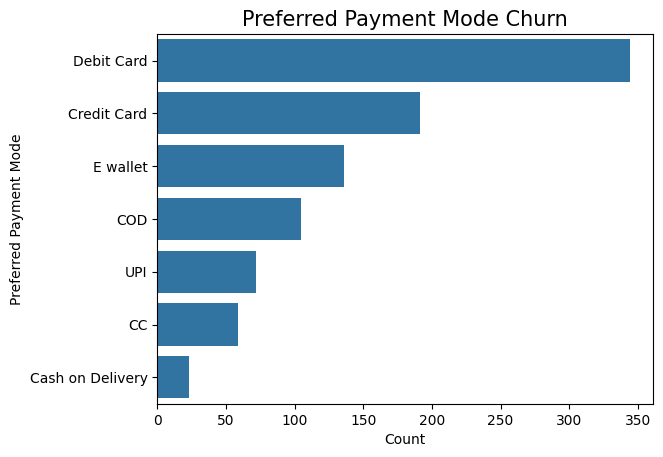

In [ ]:
sns.barplot(data=pay_method_churn.sort_values(by='Count',ascending=False),x='Count',y='PreferredPaymentMode')
plt.title('Preferred Payment Mode Churn', size=15)
plt.xlabel('Count')
plt.ylabel('Preferred Payment Mode')
plt.show()

350/930 pengguna yang berhenti menggunakan metode pembayaran debit card.

### ORDER CATEGORY

In [ ]:
category_churn=df.loc[df['Churn']==1,['CustomerID','PreferedOrderCat','PreferredPaymentMode']]
category_churn=category_churn.groupby(['PreferedOrderCat','PreferredPaymentMode'])['CustomerID'].count().reset_index(name='Count')

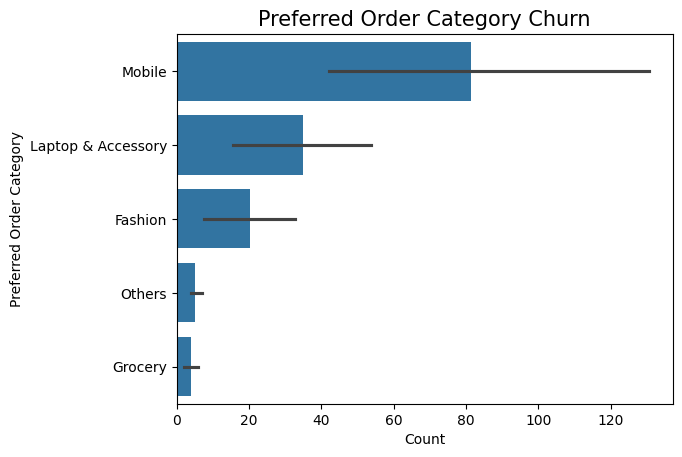

In [ ]:
sns.barplot(data=category_churn.sort_values(by='Count',ascending=False),x='Count',y='PreferedOrderCat')
plt.title('Preferred Order Category Churn', size=15)
plt.xlabel('Count')
plt.ylabel('Preferred Order Category')
plt.show()

Pengguna yang dikategorikan sebagai churn memiliki preferensi untuk membeli gadgets, seperti Mobile, Laptop & Accessories. Sedangkan pengguna yang membeli groceries, hanya sedikit yang dikategorikan sebagai pengguna churn, karena kebutuhan sehari-hari.

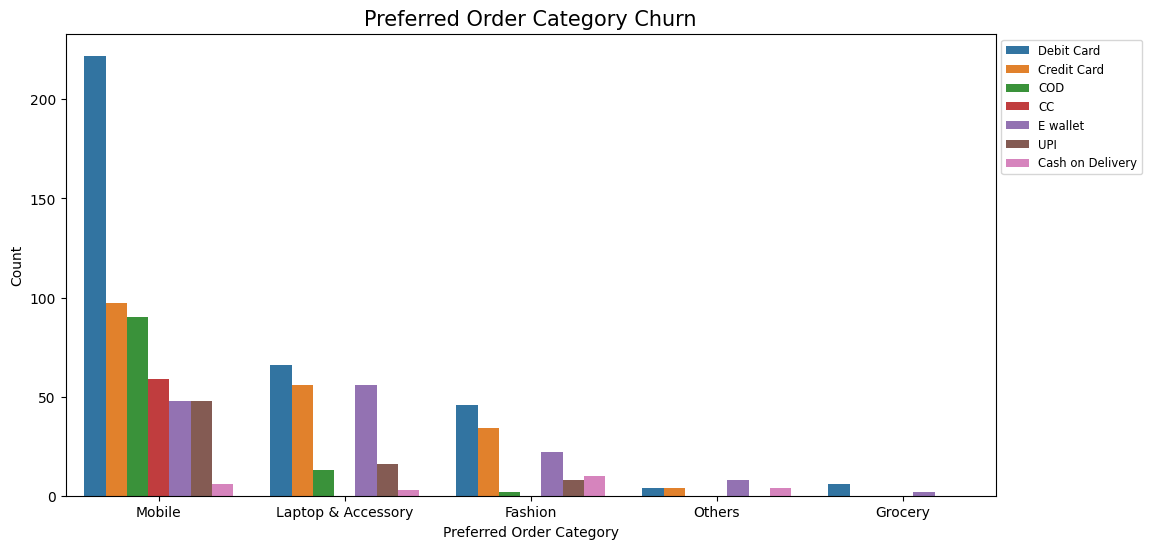

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=category_churn.sort_values(by='Count',ascending=False),x='PreferedOrderCat',y='Count',hue='PreferredPaymentMode')
plt.title('Preferred Order Category Churn', size=15)
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Pada hampir seluruh kategori, customer dengan tipe pembayaran debit card cenderung churn, terutama di kategori mobile.

### Order Amount Hike From Last Year

In [ ]:
hike_cat_churn=df.loc[df['Churn']==1,['CustomerID','OrderAmountHikeFromlastYear','PreferedOrderCat']]
hike_cat_churn

,CustomerID,OrderAmountHikeFromlastYear,PreferedOrderCat
0,50001,11.0,Laptop & Accessory
1,50002,15.0,Mobile
2,50003,14.0,Mobile
3,50004,23.0,Laptop & Accessory
4,50005,11.0,Mobile
...,...,...,...
5556,55557,14.0,Fashion
5598,55599,20.0,Mobile
5602,55603,15.0,Mobile
5604,55605,12.0,Mobile


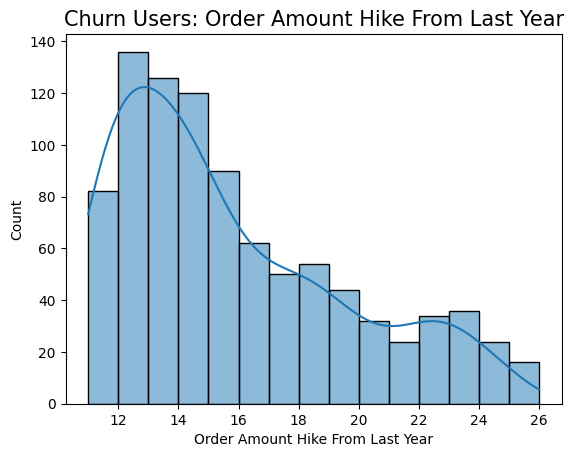

In [ ]:
sns.histplot(hike_cat_churn['OrderAmountHikeFromlastYear'],bins=15,kde=True)
plt.title('Churn Users: Order Amount Hike From Last Year', size=15)
plt.xlabel('Order Amount Hike From Last Year')
plt.ylabel('Count')
plt.show()

In [ ]:
hike_churn=hike_cat_churn.groupby(['OrderAmountHikeFromlastYear'])['CustomerID'].count().reset_index(name='Count')
hike_churn

,OrderAmountHikeFromlastYear,Count
0,11.0,82
1,12.0,136
2,13.0,126
3,14.0,118
4,14.5,2
5,15.0,90
6,16.0,62
7,17.0,50
8,18.0,54
9,19.0,44


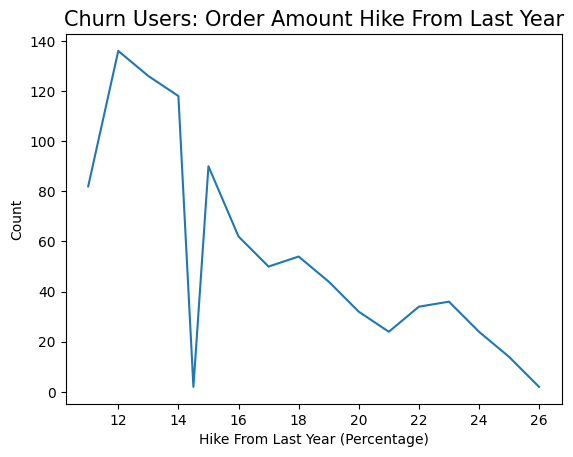

In [ ]:
sns.lineplot(data=hike_churn,x='OrderAmountHikeFromlastYear',y='Count')
plt.title('Churn Users: Order Amount Hike From Last Year', size=15)
plt.xlabel('Hike From Last Year (Percentage)')
plt.ylabel('Count')
plt.show()

Semakin tinggi kenaikan jumlah pesanan dari tahun lalu, semakin sedikit kemungkinan pengguna akan berhenti menggunakan aplikasi.

In [ ]:
hike_churn=hike_cat_churn.groupby(['OrderAmountHikeFromlastYear','PreferedOrderCat'])['CustomerID'].count().reset_index(name='Count')
hike_churn

,OrderAmountHikeFromlastYear,PreferedOrderCat,Count
0,11.0,Fashion,14
1,11.0,Grocery,4
2,11.0,Laptop & Accessory,16
3,11.0,Mobile,48
4,12.0,Fashion,26
5,12.0,Laptop & Accessory,28
6,12.0,Mobile,82
7,13.0,Fashion,22
8,13.0,Grocery,2
9,13.0,Laptop & Accessory,20


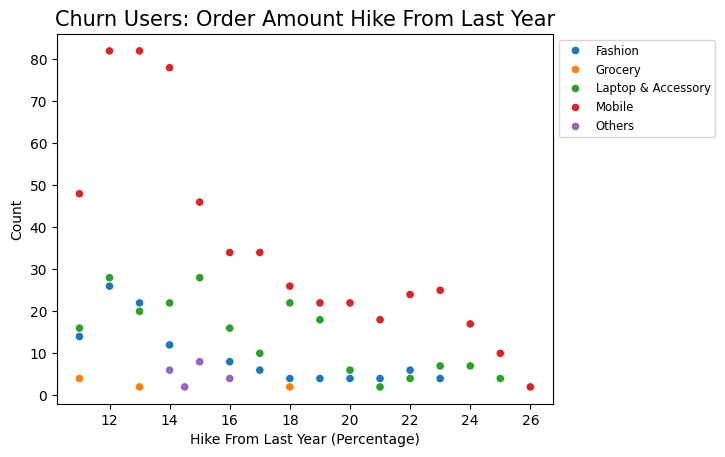

In [ ]:
sns.scatterplot(data=hike_churn,x='OrderAmountHikeFromlastYear',y='Count',hue='PreferedOrderCat')
plt.title('Churn Users: Order Amount Hike From Last Year', size=15)
plt.xlabel('Hike From Last Year (Percentage)')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Tren yang sama berlaku untuk kategori Mobile, Laptop & Accessory & Fashion. Namun pada Grocery & Other tidak ada pola tertentu, sehingga diasumsikan ada aplikasi lain yang dapat memberikan penawaran lebih baik pada dua kategori tersebut.

### ORDER COUNT

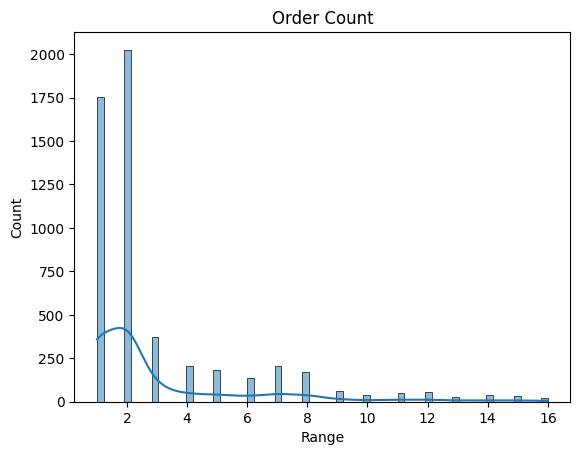

In [ ]:
sns.histplot(df['OrderCount'],kde=True)
plt.title('Order Count')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

In [ ]:
order_churn=df.groupby(['Churn','OrderCount','PreferedOrderCat'])['CustomerID'].count().reset_index(name='Count')
order_churn

,Churn,OrderCount,PreferedOrderCat,Count
0,0,1.0,Fashion,161
1,0,1.0,Grocery,44
2,0,1.0,Laptop & Accessory,629
3,0,1.0,Mobile,548
4,0,1.0,Others,53
...,...,...,...,...
115,1,15.0,Mobile,2
116,1,15.0,Others,2
117,1,16.0,Fashion,2
118,1,16.0,Mobile,2


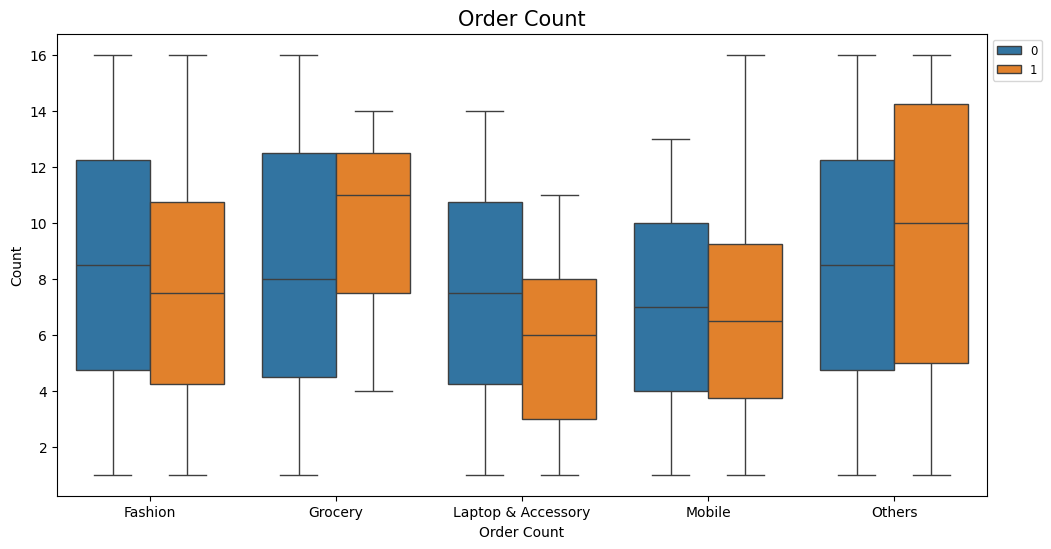

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=order_churn,x='PreferedOrderCat',y='OrderCount',hue='Churn')
plt.title('Order Count', size=15)
plt.xlabel('Order Count')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Median jumlah pembelian pengguna berhenti pada kategori fashion, laptop & accessory lebih kecil dibanding pengguna bertahan. Sementara untuk grocery median pembelian lebih tinggi, diduga karena pembelian yang tinggi & berkurangnya promosi.

### Days Since Last Order

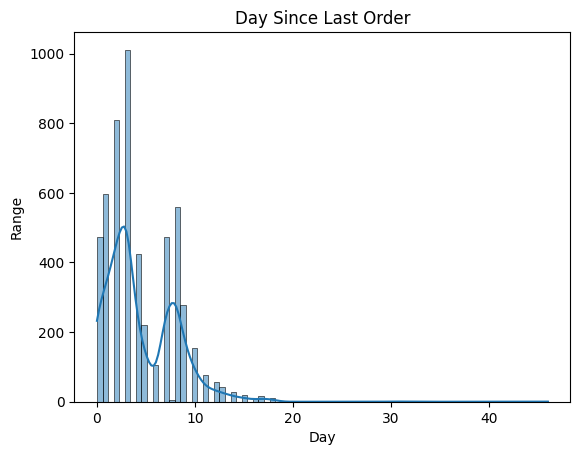

In [ ]:
sns.histplot(df['DaySinceLastOrder'],kde=True)
plt.title('Day Since Last Order')
plt.xlabel('Day')
plt.ylabel('Range')
plt.show()

In [ ]:
day_churn=df.groupby(['DaySinceLastOrder','PreferedOrderCat','Churn'])['CustomerID'].count().reset_index(name='Count')
day_churn

,DaySinceLastOrder,PreferedOrderCat,Churn,Count
0,0.0,Fashion,0,24
1,0.0,Fashion,1,16
2,0.0,Grocery,0,12
3,0.0,Laptop & Accessory,0,103
4,0.0,Laptop & Accessory,1,22
...,...,...,...,...
136,18.0,Laptop & Accessory,0,2
137,18.0,Mobile,0,4
138,30.0,Mobile,0,1
139,31.0,Mobile,0,1


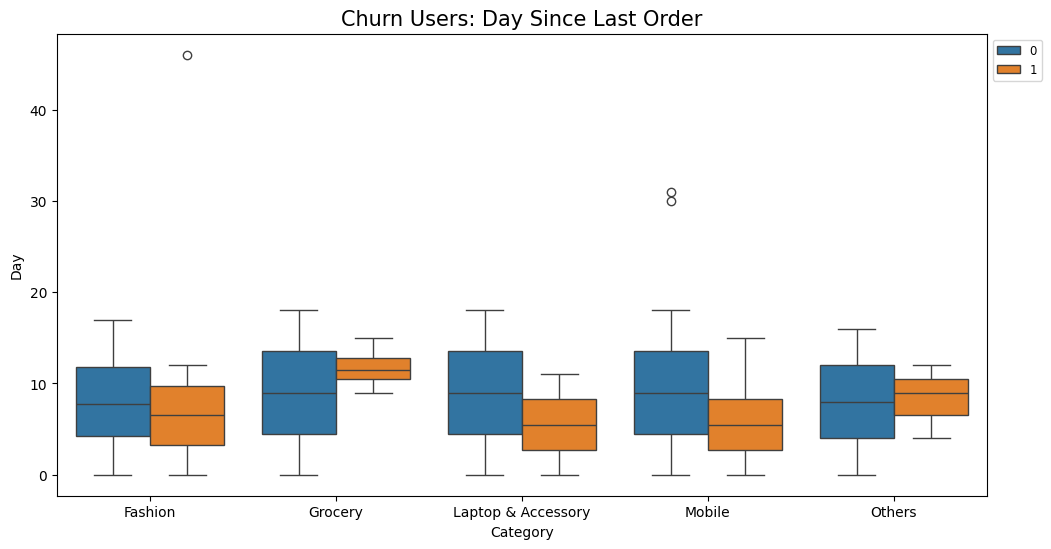

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=day_churn,x='PreferedOrderCat',y='DaySinceLastOrder',hue='Churn')
plt.title('Churn Users: Day Since Last Order', size=15)
plt.xlabel('Category')
plt.ylabel('Day')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Median hari sejak terakhir melakukan transaksi bagi pengguna berhenti lebih kecil dibanding dengan pengguna bertahan pada seluruh kategori, kecuali grocery yang merupakan kebutuhan sehari-hari.

### LRF ANALYSIS

In [ ]:
conditions=[
    (df['Tenure']<10),
    (df['Tenure']>=10) & (df['Tenure']<20),
    (df['Tenure']>=20) & (df['Tenure']<30),
    (df['Tenure']>=30) & (df['Tenure']<40),
    (df['Tenure']>=40)
]
categories=[1,2,3,4,5]
df['length_category']=np.select(conditions, categories, default=np.nan)
df['length_category']=df['length_category'].astype(int)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,length_category
0,50001,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,1
1,50002,1,1.0,Mobile,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,1
2,50003,1,1.0,Mobile,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,1
3,50004,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,1
4,50005,1,0.0,Mobile,1,12.0,CC,Male,2.0,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,1


In [ ]:
length_count=df.groupby(['Churn','length_category'])['CustomerID'].count().reset_index(name='Count')
length_count

,Churn,length_category,Count
0,0,1,2106
1,0,2,1605
2,0,3,629
3,0,4,98
4,0,5,4
5,1,1,812
6,1,2,92
7,1,3,26


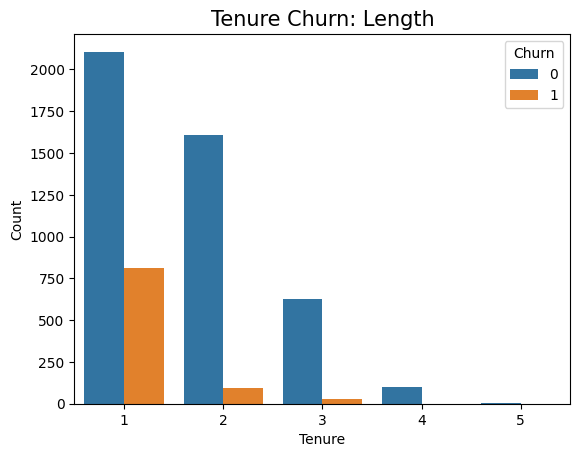

In [ ]:
sns.barplot(data=length_count,x='length_category',y='Count',hue='Churn')
plt.title('Tenure Churn: Length', size=15)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [ ]:
conditions=[
    df['OrderCount']<=3,
    (df['OrderCount']>3) & (df['OrderCount']<=6),
    (df['OrderCount']>6) & (df['OrderCount']<=9),
    (df['OrderCount']>9) & (df['OrderCount']<=12),
    (df['OrderCount']>12)
]
categories=[1,2,3,4,5]
df['freq_category']=np.select(conditions, categories, default=np.nan)
df['freq_category']=df['freq_category'].astype(int)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,length_category,freq_category
0,50001,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,159.93,1,1
1,50002,1,1.0,Mobile,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,120.90,1,1
2,50003,1,1.0,Mobile,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120.28,1,1
3,50004,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134.07,1,1
4,50005,1,0.0,Mobile,1,12.0,CC,Male,2.0,3,...,Single,3,0,11.0,1.0,1.0,3.0,129.60,1,1


In [ ]:
freq_count=df.groupby(['Churn','freq_category'])['CustomerID'].count().reset_index(name='Count')
freq_count

,Churn,freq_category,Count
0,0,1,3393
1,0,2,464
2,0,3,358
3,0,4,125
4,0,5,102
5,1,1,754
6,1,2,58
7,1,3,82
8,1,4,16
9,1,5,20


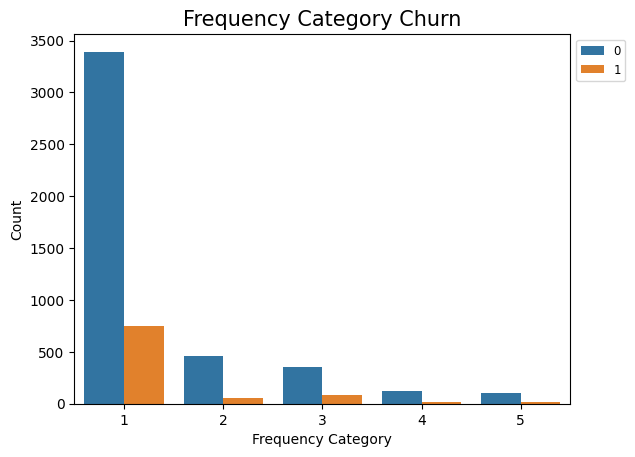

In [ ]:
sns.barplot(data=freq_count,x='freq_category',y='Count',hue='Churn')
plt.title('Frequency Category Churn', size=15)
plt.xlabel('Frequency Category')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

In [ ]:
conditions=[
    (df['DaySinceLastOrder']<10),
    (df['DaySinceLastOrder']>=10) & (df['DaySinceLastOrder']<20),
    (df['DaySinceLastOrder']>=20) & (df['DaySinceLastOrder']<30),
    (df['DaySinceLastOrder']>=30) & (df['DaySinceLastOrder']<40),
    (df['DaySinceLastOrder']>=40)
]
categories=[5,4,3,2,1]
df['recency_category']=np.select(conditions, categories, default=np.nan)
df['recency_category']=df['recency_category'].astype(int)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,length_category,freq_category,recency_category
0,50001,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,...,9,1,11.0,1.0,1.0,5.0,159.93,1,1,5
1,50002,1,1.0,Mobile,1,8.0,UPI,Male,3.0,4,...,7,1,15.0,0.0,1.0,0.0,120.90,1,1,5
2,50003,1,1.0,Mobile,1,30.0,Debit Card,Male,2.0,4,...,6,1,14.0,0.0,1.0,3.0,120.28,1,1,5
3,50004,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,...,8,0,23.0,0.0,1.0,3.0,134.07,1,1,5
4,50005,1,0.0,Mobile,1,12.0,CC,Male,2.0,3,...,3,0,11.0,1.0,1.0,3.0,129.60,1,1,5


In [ ]:
recency_count=df.groupby(['Churn','recency_category'])['CustomerID'].count().reset_index(name='Count')
recency_count

,Churn,recency_category,Count
0,0,2,2
1,0,4,388
2,0,5,4052
3,1,1,1
4,1,4,28
5,1,5,901


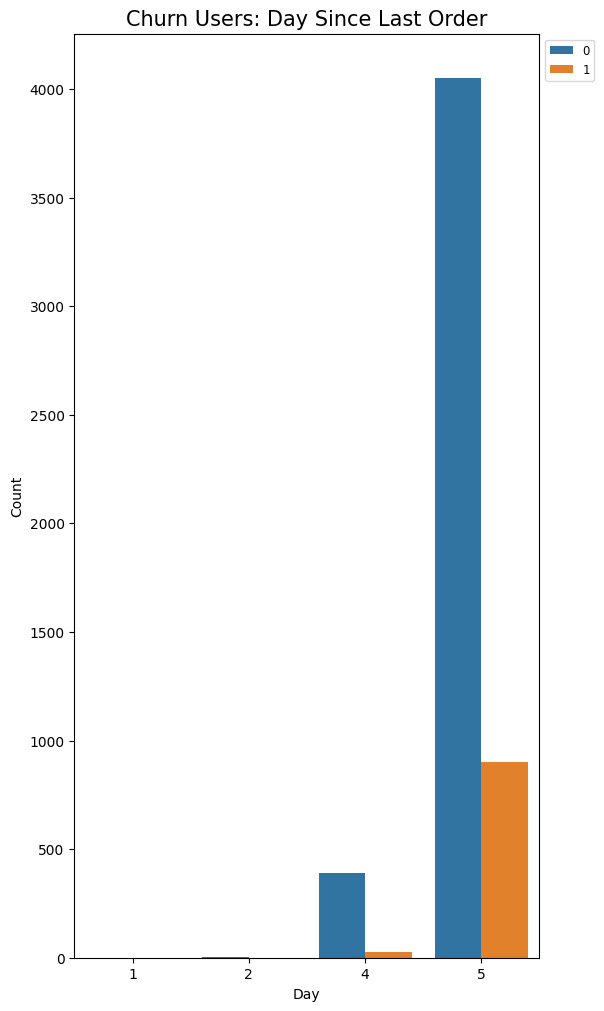

In [ ]:
plt.figure(figsize=(6,12))
sns.barplot(data=recency_count,x='recency_category',y='Count',hue='Churn')
plt.title('Churn Users: Day Since Last Order', size=15)
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

In [ ]:
df['lrf_total']=df['length_category']+df['recency_category']+df['freq_category']
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,length_category,freq_category,recency_category,lrf_total
0,50001,1,4.0,Mobile,3,6.0,Debit Card,Female,3.0,3,...,1,11.0,1.0,1.0,5.0,159.93,1,1,5,7
1,50002,1,1.0,Mobile,1,8.0,UPI,Male,3.0,4,...,1,15.0,0.0,1.0,0.0,120.90,1,1,5,7
2,50003,1,1.0,Mobile,1,30.0,Debit Card,Male,2.0,4,...,1,14.0,0.0,1.0,3.0,120.28,1,1,5,7
3,50004,1,0.0,Mobile,3,15.0,Debit Card,Male,2.0,4,...,0,23.0,0.0,1.0,3.0,134.07,1,1,5,7
4,50005,1,0.0,Mobile,1,12.0,CC,Male,2.0,3,...,0,11.0,1.0,1.0,3.0,129.60,1,1,5,7


In [ ]:
lrf_count=df.groupby(['Churn','lrf_total'])['CustomerID'].count().reset_index(name='Count')
lrf_count

,Churn,lrf_total,Count
0,0,4,2
1,0,6,38
2,0,7,1787
3,0,8,1357
4,0,9,705
5,0,10,318
6,0,11,139
7,0,12,67
8,0,13,29
9,1,6,9


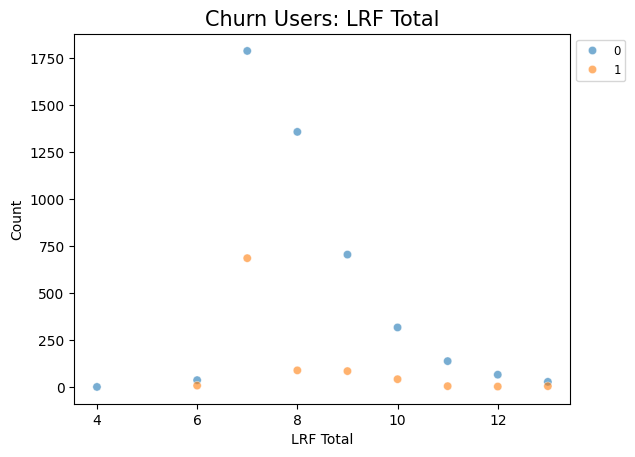

In [ ]:
sns.scatterplot(data=lrf_count,x='lrf_total',y='Count',hue='Churn',alpha=0.6)
plt.title('Churn Users: LRF Total', size=15)
plt.xlabel('LRF Total')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Pengguna churn lebih banyak di angka 7, di mana durasi sejak terakhir pemesanan dikategorikan singkat (diberi nilai 5). Beberapa ada yang memiliki nilai besar, dengan jumlah yang sama dengan pengguna bertahan. Oleh karena itu perlu dilakukan penyelidikkan lebih lanjut terkait promosi.

## PROMOTION

### COUPON USED

In [ ]:
coupon_cat_churn=df.loc[df['Churn']==1,['CustomerID','CouponUsed','PreferedOrderCat']]
coupon_cat_churn=coupon_cat_churn.groupby(['CouponUsed','PreferedOrderCat'])['CustomerID'].count().reset_index(name='Count')
coupon_cat_churn

,CouponUsed,PreferedOrderCat,Count
0,0.0,Fashion,21
1,0.0,Laptop & Accessory,42
2,0.0,Mobile,122
3,1.0,Fashion,37
4,1.0,Grocery,1
5,1.0,Laptop & Accessory,83
6,1.0,Mobile,249
7,1.0,Others,6
8,2.0,Fashion,23
9,2.0,Grocery,2


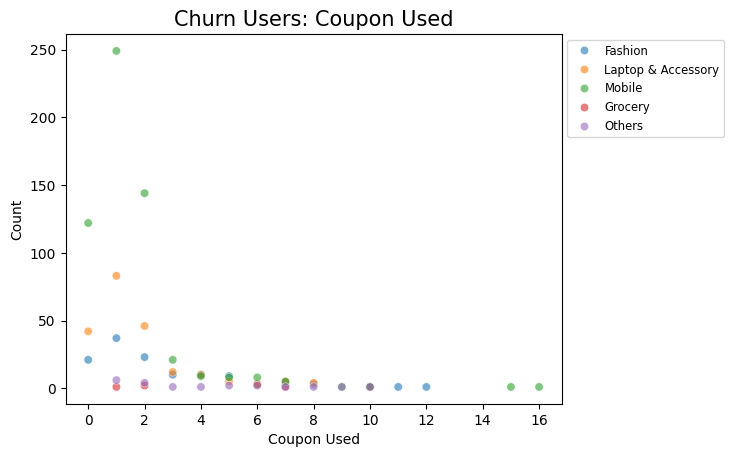

In [ ]:
sns.scatterplot(data=coupon_cat_churn,x='CouponUsed',y='Count',hue='PreferedOrderCat',alpha=0.6)
plt.title('Churn Users: Coupon Used', size=15)
plt.xlabel('Coupon Used')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

In [ ]:
coupon_churn=df.groupby(['Churn','CouponUsed','PreferedOrderCat'])['CustomerID'].count().reset_index(name='Count')
coupon_churn

,Churn,CouponUsed,PreferedOrderCat,Count
0,0,0.0,Fashion,107
1,0,0.0,Grocery,8
2,0,0.0,Laptop & Accessory,362
3,0,0.0,Mobile,315
4,0,0.0,Others,15
...,...,...,...,...
109,1,10.0,Others,1
110,1,11.0,Fashion,1
111,1,12.0,Fashion,1
112,1,15.0,Mobile,1


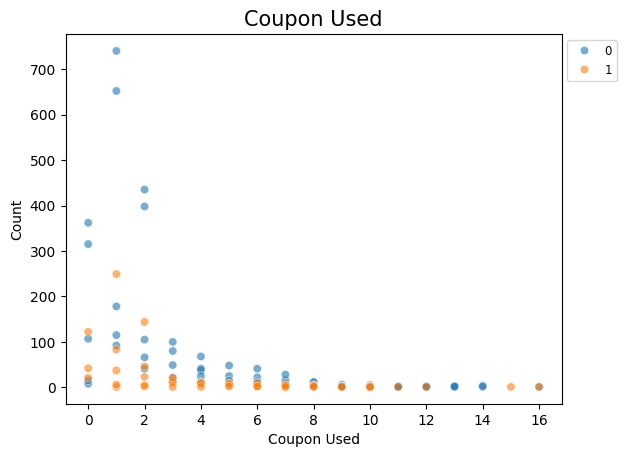

In [ ]:
sns.scatterplot(data=coupon_churn,x='CouponUsed',y='Count',hue='Churn',alpha=0.6)
plt.title('Coupon Used', size=15)
plt.xlabel('Coupon Used')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Pengguna yang berhenti menggunakan aplikasi cenderung menggunakan kupon kurang dari 4. Beberapa berhenti menggunakan aplikasi walaupun penggunaan kupon banyak, sehingga perlu dilakukan pengecekkan untuk nilai promosinya.

### CASHBACK AMOUNT

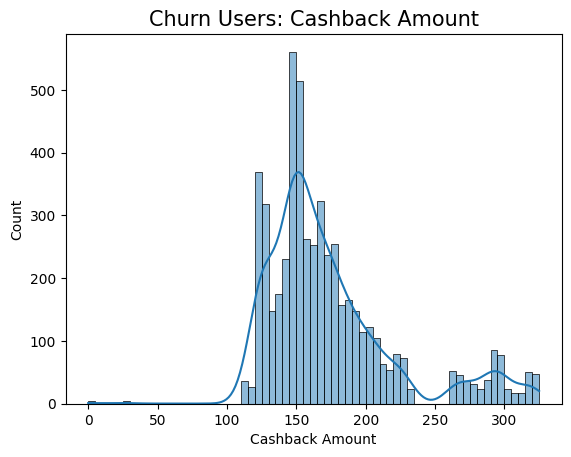

In [ ]:
sns.histplot(df['CashbackAmount'],kde=True)
plt.title('Churn Users: Cashback Amount', size=15)
plt.xlabel('Cashback Amount')
plt.ylabel('Count')
plt.show()

In [ ]:
cashback_churn=df.loc[df['Churn']==1,['CustomerID','CashbackAmount']]
cashback_churn=cashback_churn.groupby('CashbackAmount')['CustomerID'].count().reset_index(name='Count')
cashback_churn

,CashbackAmount,Count
0,110.09,2
1,110.81,2
2,110.91,2
3,111.02,2
4,111.18,2
...,...,...
452,313.24,2
453,317.46,2
454,320.45,2
455,323.45,2


In [ ]:
conditions=[
    (cashback_churn['CashbackAmount']<100),
    (cashback_churn['CashbackAmount']>=100) & (cashback_churn['CashbackAmount']<200),
    (cashback_churn['CashbackAmount']>=200) & (cashback_churn['CashbackAmount']<300),
    (cashback_churn['CashbackAmount']>=300)
]
categories=['<100','100-199','200-299','>300']
cashback_churn['cashback_category'] = np.select(conditions, categories, default='np.nan')
cashback_churn

,CashbackAmount,Count,cashback_category
0,110.09,2,100-199
1,110.81,2,100-199
2,110.91,2,100-199
3,111.02,2,100-199
4,111.18,2,100-199
...,...,...,...
452,313.24,2,>300
453,317.46,2,>300
454,320.45,2,>300
455,323.45,2,>300


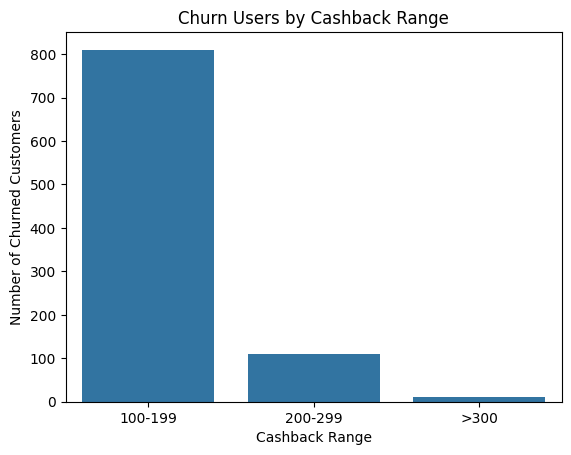

In [ ]:
sns.barplot(data=cashback_churn.groupby('cashback_category', as_index=False)['Count'].sum(),
            x='cashback_category',y='Count')
plt.title('Churn Users by Cashback Range')
plt.xlabel('Cashback Range')
plt.ylabel('Number of Churned Customers')
plt.show()

Pengguna yang churn cenderung memiliki nilai cashback atau promosi pada range 100-199.

### CASHBACK VS. NUMBER OF COUPON

In [ ]:
cashback_coupon_churn=df.loc[df['Churn']==1,['CustomerID','CouponUsed','CashbackAmount']]
cashback_coupon_churn=cashback_coupon_churn.groupby(['CouponUsed','CashbackAmount'])['CustomerID'].count().reset_index(name='Count')
cashback_coupon_churn

,CouponUsed,CashbackAmount,Count
0,0.0,110.09,1
1,0.0,110.81,2
2,0.0,110.91,1
3,0.0,111.02,1
4,0.0,112.61,2
...,...,...,...
723,10.0,320.45,1
724,11.0,203.12,1
725,12.0,228.12,1
726,15.0,127.43,1


In [ ]:
conditions=[
    (cashback_coupon_churn['CashbackAmount']<100),
    (cashback_coupon_churn['CashbackAmount']>=100) & (cashback_coupon_churn['CashbackAmount']<200),
    (cashback_coupon_churn['CashbackAmount']>=200) & (cashback_coupon_churn['CashbackAmount']<300),
    (cashback_coupon_churn['CashbackAmount']>=300)
]
categories=['<100','100-199','200-299','>300']
cashback_coupon_churn['cashback_category'] = np.select(conditions, categories, default='np.nan')
cashback_coupon_churn

,CouponUsed,CashbackAmount,Count,cashback_category
0,0.0,110.09,1,100-199
1,0.0,110.81,2,100-199
2,0.0,110.91,1,100-199
3,0.0,111.02,1,100-199
4,0.0,112.61,2,100-199
...,...,...,...,...
723,10.0,320.45,1,>300
724,11.0,203.12,1,200-299
725,12.0,228.12,1,200-299
726,15.0,127.43,1,100-199


In [ ]:
cashback_coupon_churn=cashback_coupon_churn.groupby(['CouponUsed','cashback_category'])['Count'].sum().reset_index()
cashback_coupon_pivot=cashback_coupon_churn.pivot(index='CouponUsed',columns='cashback_category',values='Count')
cashback_coupon_pivot=cashback_coupon_pivot.fillna(0)
cashback_coupon_pivot

cashback_category,100-199,200-299,>300
CouponUsed,,,
0.0,178.0,7.0,0.0
1.0,345.0,30.0,1.0
2.0,192.0,23.0,4.0
3.0,34.0,10.0,0.0
4.0,19.0,10.0,1.0
5.0,13.0,11.0,0.0
6.0,11.0,6.0,2.0
7.0,11.0,5.0,0.0
8.0,3.0,4.0,1.0


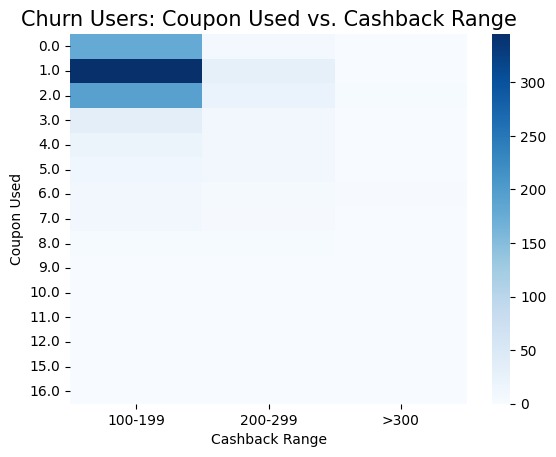

In [ ]:
sns.heatmap(data=cashback_coupon_pivot,cmap='Blues',)
plt.title('Churn Users: Coupon Used vs. Cashback Range', size=15)
plt.xlabel('Cashback Range')
plt.ylabel('Coupon Used')
plt.show()

Pengguna yang berhenti cenderung menggunakan sedikit kupon 0-2, dengan jumlah range cashback terkecil yaitu 100-199.

### CASHBACK VS. ORDER CATEGORY

In [ ]:
coupon_category_churn=df.loc[df['Churn']==1,['CustomerID','PreferedOrderCat','CashbackAmount']]
coupon_category_churn=coupon_category_churn.groupby(['CashbackAmount','PreferedOrderCat'])['CustomerID'].count().reset_index(name='Count')
coupon_category_churn

,CashbackAmount,PreferedOrderCat,Count
0,110.09,Mobile,2
1,110.81,Mobile,2
2,110.91,Mobile,2
3,111.02,Mobile,2
4,111.18,Mobile,2
...,...,...,...
454,313.24,Others,2
455,317.46,Others,2
456,320.45,Others,2
457,323.45,Others,2


In [ ]:
conditions=[
    (coupon_category_churn['CashbackAmount']<100),
    (coupon_category_churn['CashbackAmount']>=100) & (coupon_category_churn['CashbackAmount']<200),
    (coupon_category_churn['CashbackAmount']>=200) & (coupon_category_churn['CashbackAmount']<300),
    (coupon_category_churn['CashbackAmount']>=300)
]
categories=['<100','100-199','200-299','>300']
coupon_category_churn['cashback_category'] = np.select(conditions, categories, default='np.nan')
coupon_category_churn

,CashbackAmount,PreferedOrderCat,Count,cashback_category
0,110.09,Mobile,2,100-199
1,110.81,Mobile,2,100-199
2,110.91,Mobile,2,100-199
3,111.02,Mobile,2,100-199
4,111.18,Mobile,2,100-199
...,...,...,...,...
454,313.24,Others,2,>300
455,317.46,Others,2,>300
456,320.45,Others,2,>300
457,323.45,Others,2,>300


In [ ]:
coupon_category_churn=coupon_category_churn.groupby(['cashback_category','PreferedOrderCat'])['Count'].sum().reset_index()
coupon_category_churn

,cashback_category,PreferedOrderCat,Count
0,100-199,Fashion,42
1,100-199,Laptop & Accessory,198
2,100-199,Mobile,570
3,200-299,Fashion,80
4,200-299,Grocery,8
5,200-299,Laptop & Accessory,12
6,200-299,Others,10
7,>300,Others,10


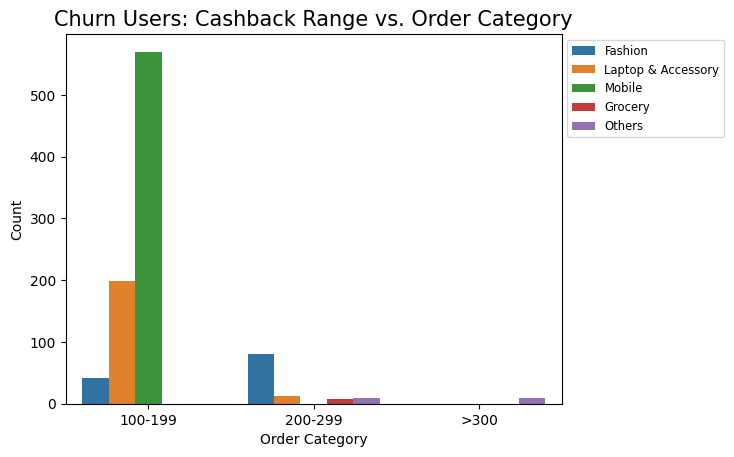

In [ ]:
sns.barplot(data=coupon_category_churn,x='cashback_category',y='Count',hue='PreferedOrderCat')
plt.title('Churn Users: Cashback Range vs. Order Category', size=15)
plt.xlabel('Order Category')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Jika dilihat berdasarkan kategori, pengguna dengan prederensi mobile berhenti dikarenakan jumlah cashback di angka 100-199.

In [ ]:
coupon_category_pivot=coupon_category_churn.pivot(index='PreferedOrderCat',columns='cashback_category',values='Count')
coupon_category_pivot=coupon_category_pivot.fillna(0).astype(int)
coupon_category_pivot

cashback_category,100-199,200-299,>300
PreferedOrderCat,,,
Fashion,42,80,0
Grocery,0,8,0
Laptop & Accessory,198,12,0
Mobile,570,0,0
Others,0,10,10


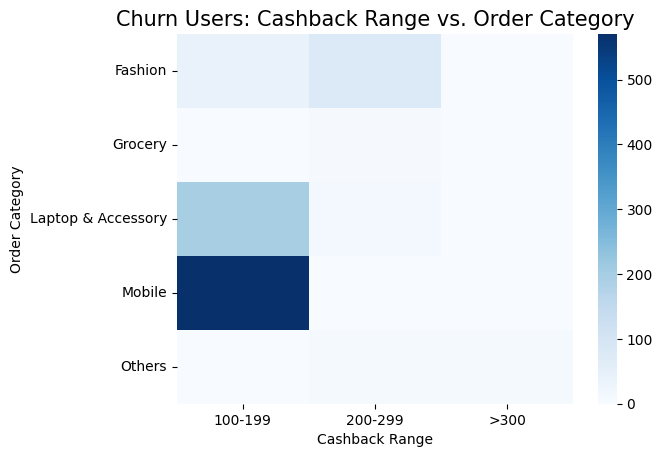

In [ ]:
sns.heatmap(data=coupon_category_pivot,cmap='Blues',)
plt.title('Churn Users: Cashback Range vs. Order Category', size=15)
plt.xlabel('Cashback Range')
plt.ylabel('Order Category')
plt.show()

### CASHBACK VS CITY TIER

In [ ]:
city_category_churn=df.loc[df['Churn']==1,['CustomerID','CashbackAmount','CityTier']]
city_category_churn=city_category_churn.groupby(['CashbackAmount','CityTier'])['CustomerID'].count().reset_index(name='Count')
city_category_churn

,CashbackAmount,CityTier,Count
0,110.09,1,2
1,110.81,3,2
2,110.91,3,2
3,111.02,1,2
4,111.18,3,2
...,...,...,...
454,313.24,3,2
455,317.46,1,2
456,320.45,1,2
457,323.45,3,2


In [ ]:
conditions=[
    (city_category_churn['CashbackAmount']<100),
    (city_category_churn['CashbackAmount']>=100) & (city_category_churn['CashbackAmount']<200),
    (city_category_churn['CashbackAmount']>=200) & (city_category_churn['CashbackAmount']<300),
    (city_category_churn['CashbackAmount']>=300)
]
categories=['<100','100-199','200-299','>300']
city_category_churn['cashback_category'] = np.select(conditions, categories, default='np.nan')
city_category_churn

,CashbackAmount,CityTier,Count,cashback_category
0,110.09,1,2,100-199
1,110.81,3,2,100-199
2,110.91,3,2,100-199
3,111.02,1,2,100-199
4,111.18,3,2,100-199
...,...,...,...,...
454,313.24,3,2,>300
455,317.46,1,2,>300
456,320.45,1,2,>300
457,323.45,3,2,>300


In [ ]:
city_category_churn=city_category_churn.groupby(['cashback_category','CityTier'])['Count'].sum().reset_index()
city_category_churn

,cashback_category,CityTier,Count
0,100-199,1,478
1,100-199,2,42
2,100-199,3,290
3,200-299,1,42
4,200-299,2,6
5,200-299,3,62
6,>300,1,6
7,>300,3,4


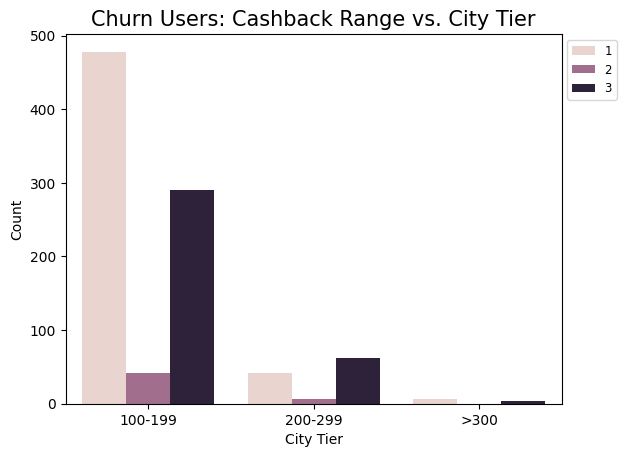

In [ ]:
sns.barplot(data=city_category_churn,x='cashback_category',y='Count',hue='CityTier')
plt.title('Churn Users: Cashback Range vs. City Tier', size=15)
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Pengguna yang tinggal pada CityTier 1, 2 & 3 berhenti menggunakan aplikasi pada range cashback 100-199.

### CASHBACK AMOUNT VS. WAREHOUSE TO HOME

In [ ]:
cashback_distance_churn=df.loc[df['Churn']==1,['CustomerID','CashbackAmount','WarehouseToHome']]
cashback_distance_churn

,CustomerID,CashbackAmount,WarehouseToHome
0,50001,159.93,6.0
1,50002,120.90,8.0
2,50003,120.28,30.0
3,50004,134.07,15.0
4,50005,129.60,12.0
...,...,...,...
5556,55557,229.48,31.0
5598,55599,142.90,16.0
5602,55603,172.87,8.0
5604,55605,148.39,14.0


In [ ]:
conditions=[
    (cashback_distance_churn['CashbackAmount']<100),
    (cashback_distance_churn['CashbackAmount']>=100) & (cashback_distance_churn['CashbackAmount']<200),
    (cashback_distance_churn['CashbackAmount']>=200) & (cashback_distance_churn['CashbackAmount']<300),
    (cashback_distance_churn['CashbackAmount']>=300)
]
categories=['<100','100-199','200-299','>300']
cashback_distance_churn['cashback_category'] = np.select(conditions, categories, default='np.nan')
cashback_distance_churn

,CustomerID,CashbackAmount,WarehouseToHome,cashback_category
0,50001,159.93,6.0,100-199
1,50002,120.90,8.0,100-199
2,50003,120.28,30.0,100-199
3,50004,134.07,15.0,100-199
4,50005,129.60,12.0,100-199
...,...,...,...,...
5556,55557,229.48,31.0,200-299
5598,55599,142.90,16.0,100-199
5602,55603,172.87,8.0,100-199
5604,55605,148.39,14.0,100-199


In [ ]:
conditions=[
    (cashback_distance_churn['WarehouseToHome']<10),
    (cashback_distance_churn['WarehouseToHome']>=10) & (cashback_distance_churn['WarehouseToHome']<20),
    (cashback_distance_churn['WarehouseToHome']>=20) & (cashback_distance_churn['WarehouseToHome']<30),
    (cashback_distance_churn['WarehouseToHome']>=30)
]
categories=['<10','10-19','20-29','>30']
cashback_distance_churn['distance_category'] = np.select(conditions, categories, default='np.nan')
cashback_distance_churn

,CustomerID,CashbackAmount,WarehouseToHome,cashback_category,distance_category
0,50001,159.93,6.0,100-199,<10
1,50002,120.90,8.0,100-199,<10
2,50003,120.28,30.0,100-199,>30
3,50004,134.07,15.0,100-199,10-19
4,50005,129.60,12.0,100-199,10-19
...,...,...,...,...,...
5556,55557,229.48,31.0,200-299,>30
5598,55599,142.90,16.0,100-199,10-19
5602,55603,172.87,8.0,100-199,<10
5604,55605,148.39,14.0,100-199,10-19


In [ ]:
cashback_distance_churn=cashback_distance_churn.groupby(['cashback_category','distance_category'])['CustomerID'].count().reset_index(name='Count')
cashback_distance_churn

,cashback_category,distance_category,Count
0,100-199,10-19,382
1,100-199,20-29,146
2,100-199,<10,184
3,100-199,>30,98
4,200-299,10-19,44
5,200-299,20-29,20
6,200-299,<10,28
7,200-299,>30,18
8,>300,10-19,2
9,>300,<10,8


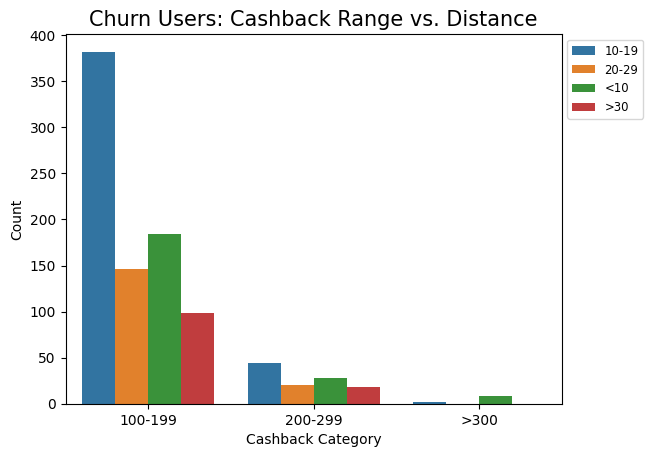

In [ ]:
sns.barplot(data=cashback_distance_churn,x='cashback_category',y='Count',hue='distance_category')
plt.title('Churn Users: Cashback Range vs. Distance', size=15)
plt.xlabel('Cashback Category')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc=2,fontsize='small')
plt.show()

Pengguna pada seluruh jarak berhenti menggunakan aplikasi pada range cashback 100-199, terutama pada jarak tempat tinggal ke gudang terdekat.

# REKOMENDASI

Berdasarkan analisis users:
1. Penanganan komplain harus kurang dari 1x24 jam, dan permintaan nilai pelayanan supaya bisa dilakukan assessment lebih lanjut.
2. Pembuatan promo kerjasama dengan bank terkait credit / debit card untuk kategori gadgets: mobile, laptop & accessory.
3. Memberikan notifikasi untuk memberikan reminder dan menarik pengguna dengan promo apabila telah tidak aktif selama 7-10 hari

Berdasarkan promosi:
1. Pemberlakuan loyalty points, sehingga semakin aktif akan semakin besar cacshback yang diterima
2. Pembuatan kerjasama dengan brand terkatit gadgets: mobile, laptop & accessory untuk reaktivasi pengguna
3. Pembuatan voucher gratis ongkos kirim dengan minimum purchase dan maximum delivery fee.